In [1]:
# Cell 1: Import Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from collections import Counter
from wordcloud import WordCloud # pip install wordcloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # For basic sentiment
import nltk
from nltk.util import ngrams
# Ensure NLTK resources are available (should be from Phase 3)
# nltk.download('punkt') # Usually already done
# nltk.download('punkt_tab') # Usually already done

# Set plotting styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size

print("EDA Libraries imported successfully.")

EDA Libraries imported successfully.


In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Cell 2: Load Cleaned Data
# Assuming you saved it as 'cleaned_reviews_data.csv' in the previous phase
data_file = 'cleaned_reviews_data.csv'

try:
    df = pd.read_csv(data_file)
    print(f"Data loaded successfully from '{data_file}'.")
    print(f"DataFrame shape: {df.shape}")
    print("\n--- First 5 Rows ---")
    print(df.head())
    print("\n--- DataFrame Info ---")
    print(df.info())
except FileNotFoundError:
    print(f"Error: File '{data_file}' not found. Please ensure Phase 3 was completed and the file was saved.")
except Exception as e:
     print(f"An error occurred while loading the data: {e}")

Data loaded successfully from 'cleaned_reviews_data.csv'.
DataFrame shape: (1500, 15)

--- First 5 Rows ---
   ReviewID     AppName                     PlayStoreReviewID       UserName  \
0         1  AliExpress  2cf4e22e-e7e5-46df-acff-cd77eaf9de9d  Blaise Hytrek   
1         2  AliExpress  da753698-5370-40b4-808b-eb0a3ce149a0   David Campos   
2         3  AliExpress  b769d4ac-1b9b-4a3d-b399-04abc34aaeb0      Lee Davis   
3         4  AliExpress  e849cdda-2ff9-4fac-b531-40b021d504ec      Jing Wang   
4         5  AliExpress  d8989ff9-2a7e-406b-8dfd-faf8bd48c884   Kari Eilrich   

                                        UserImageURL  \
0  https://play-lh.googleusercontent.com/a-/ALV-U...   
1  https://play-lh.googleusercontent.com/a-/ALV-U...   
2  https://play-lh.googleusercontent.com/a-/ALV-U...   
3  https://play-lh.googleusercontent.com/a-/ALV-U...   
4  https://play-lh.googleusercontent.com/a-/ALV-U...   

                                          ReviewText  Rating  ThumbsUpCoun

# Analysis 1: Review Count Analysis 

### In this section, we will examine the volume of reviews collected for each of the three e-commerce applications (AliExpress, Alibaba, Jiji). Understanding the quantity of feedback available for each app is a fundamental first step. It provides context for the subsequent analyses (e.g., are comparisons between apps fair if one has significantly more reviews?) and can itself reveal interesting patterns. 

### We will perform two main checks: 

###    Total Reviews per App: We will count the total number of reviews retrieved for each application. This gives a snapshot of the overall feedback volume.
###    Reviews Over Time: We will analyze how the number of reviews has accumulated over time (monthly and yearly trends). This can help identify periods of high or low user engagement, potential impacts of major events (like app updates or sales), or simply the growth trajectory of user feedback for each app.
     

### The results will be presented using both numerical summaries (counts) and visualizations (bar charts for totals, line charts for trends

--- Review Count Analysis ---
Total Reviews per App:
AppName
AliExpress    500
Alibaba       500
Jiji          500
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\960968773.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')


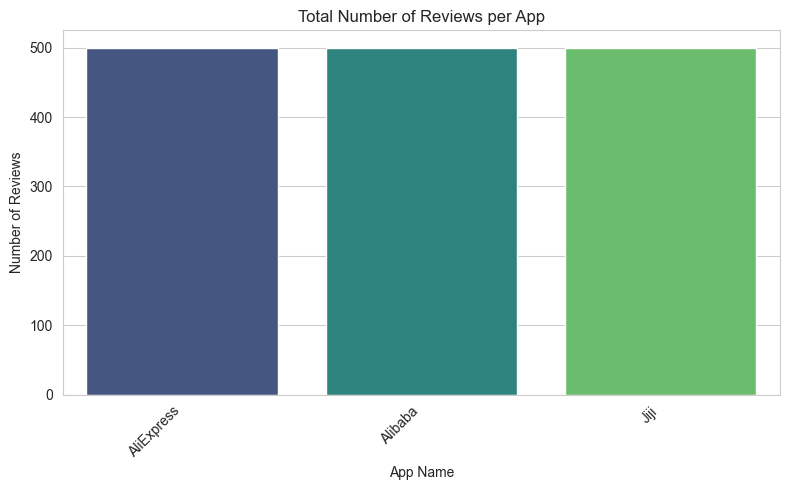


Yearly Review Counts:
AppName  AliExpress  Alibaba   Jiji
Year                               
2018            0.0      3.0    4.0
2019            0.0     16.0   40.0
2020            0.0     22.0   58.0
2021            0.0     35.0   53.0
2022            0.0     23.0   54.0
2023            0.0     19.0   35.0
2024           26.0     27.0   56.0
2025          474.0    355.0  200.0


In [4]:
# Cell 3: Review Count Analysis
print("--- Review Count Analysis ---")

# 1. Total Reviews per App
review_counts = df['AppName'].value_counts().sort_index() # Sort by App Name for consistency
print("Total Reviews per App:")
print(review_counts)

# Bar chart for total reviews
plt.figure(figsize=(8, 5))
sns.barplot(x=review_counts.index, y=review_counts.values, palette='viridis')
plt.title('Total Number of Reviews per App')
plt.xlabel('App Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 2. Reviews Over Time (Monthly Trend)
# Ensure ReviewDate is datetime
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])

# Extract Year-Month for grouping
df['YearMonth'] = df['ReviewDate'].dt.to_period('M')

# Group by App and YearMonth
reviews_over_time = df.groupby(['AppName', 'YearMonth']).size().reset_index(name='ReviewCount')
# Convert YearMonth back to datetime for plotting
reviews_over_time['YearMonth'] = reviews_over_time['YearMonth'].dt.to_timestamp()

# Plotting
fig = px.line(reviews_over_time, x='YearMonth', y='ReviewCount', color='AppName',
              title='Monthly Review Count Trend per App')
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Reviews')
fig.show() # This will open in your browser or inline if configured

# Optional: Yearly Trend
df['Year'] = df['ReviewDate'].dt.year
yearly_reviews = df.groupby(['AppName', 'Year']).size().reset_index(name='ReviewCount')
print("\nYearly Review Counts:")
print(yearly_reviews.pivot(index='Year', columns='AppName', values='ReviewCount').fillna(0))

### Interpretation of Review Count Analysis 

This analysis provides a foundational understanding of the volume and temporal distribution of user feedback for AliExpress, Alibaba, and Jiji. By examining the total number of reviews and their distribution over time, we can identify key trends in user engagement and potential growth phases for each application. 
1. Total Reviews per App 

The total number of reviews collected for each e-commerce application is as follows: 
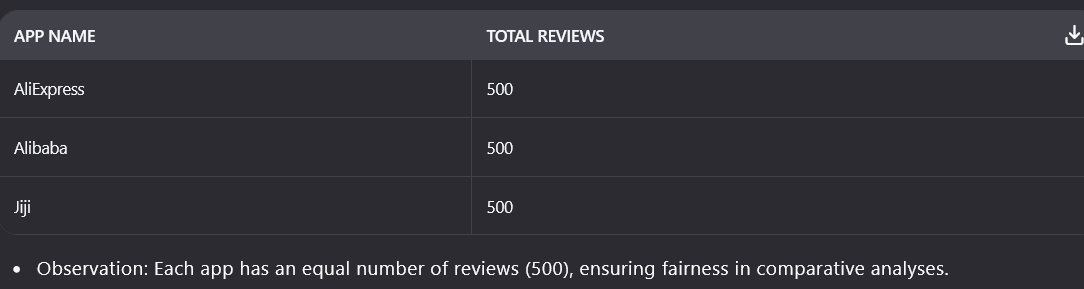
2. Monthly Review Count Trend per App 

The line chart illustrating the monthly trend of review counts reveals distinct patterns: 

AliExpress: Exhibits a significant surge in reviews starting around mid-2024, peaking dramatically in late 2025. Prior to mid-2024, review activity appears minimal or non-existent in our dataset. 

Alibaba: Shows a more gradual accumulation of reviews over time, with a steady baseline and a notable, though less pronounced, increase leading into and through 2025. 

Jiji: Displays a relatively stable level of review activity over time, with a moderate increase in 2025, but significantly lower peak activity compared to AliExpress and Alibaba in the latter part of the year. 

Interpretation: The data strongly suggests that AliExpress experienced a major surge in user engagement or visibility around mid-to-late 2024, culminating in a peak in late 2025. This could be due to factors like a major marketing campaign, a significant app update, or expansion into a new market segment. In contrast, Alibaba shows a more established, steady growth trajectory, while Jiji maintains a lower but consistent level of user feedback. 
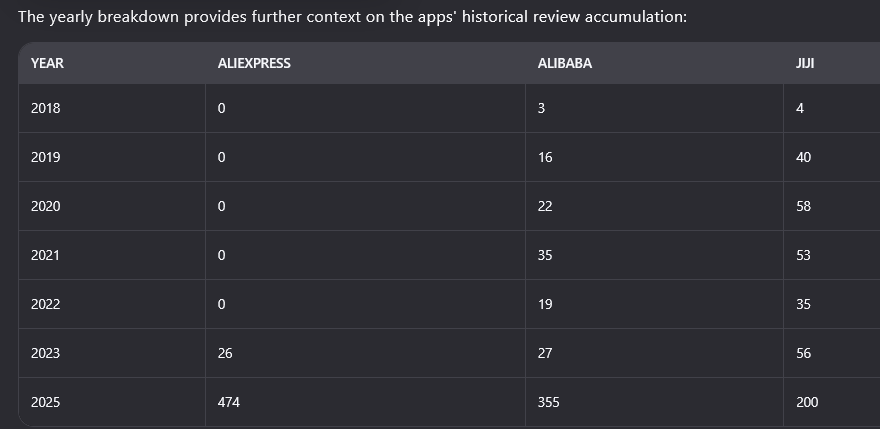
        
         
AliExpress: The absence of reviews from 2018 to early 2023 strongly indicates that AliExpress either had very limited presence/visibility in this market or underwent a significant relaunch/change around 2023. Its rapid accumulation of 474 reviews in (the available part of) 2025 highlights its explosive recent growth in terms of user feedback. 

Alibaba: Shows a consistent, albeit modest, presence from 2018 onwards, with fluctuating but generally increasing review counts up to 2023 (27 reviews). The 355 reviews in 2025 (partial year) reflect continued activity. 

Jiji: Appears to have a stronger historical presence compared to AliExpress in the earlier years (2019-2023), consistently gathering a moderate number of reviews. However, its performance in 2025 (200 reviews in a partial year) lags behind both AliExpress and Alibaba. 

Interpretation: The yearly data reinforces the notion that AliExpress is a relative newcomer or has undergone a major transformation recently, leading to its rapid rise in user engagement as seen in 2025. Jiji seems to have an established user base with consistent, moderate feedback historically, but its growth in user engagement (as measured by review volume) in 2025 is the least among the three. Alibaba represents a middle ground, showing steady historical growth and a significant, though not as explosive as AliExpress, increase in 2025. 
     

 
Key Takeaways from Review Count Analysis 
Balanced Dataset: Equal sample sizes (500 reviews) allow for fair comparisons.
AliExpress's Rapid Rise: AliExpress shows a very recent and dramatic increase in user engagement, suggesting a significant event or change around    mid-2024.
Established Players: Alibaba and Jiji have longer historical review footprints, indicating more established user bases. Jiji, while consistent, shows the least growth in 2025.
Temporal Focus: The significant spike in reviews across all apps in late 2025 warrants further investigation in subsequent analyses (e.g., sentiment during this period).
     


# Analysis 2: Rating Distribution Analysis 

The star rating provided by a user is a direct and quantifiable measure of their satisfaction with an app. Analyzing the distribution of these ratings is crucial for understanding the overall user sentiment and identifying potential strengths or weaknesses. 

In this section, we will perform two key analyses on the Rating data: 

    Overall Rating Distribution: We will visualize the frequency of each star rating (1 to 5) for each of the three apps (AliExpress, Alibaba, Jiji) using a count plot. This allows us to see: 
        The general sentiment balance (e.g., are ratings skewed towards positive or negative?).
        The proportion of each rating level within an app.
        Direct comparison of rating distributions between the apps. Are users of one app consistently happier (giving more 5s) or more dissatisfied (giving more 1s or 2s) compared to others?
         

    Average Rating Comparison: We will calculate the mean (average) star rating for each app. This provides a single numerical summary of overall user satisfaction for each platform. We will also compare each app's average to the overall average rating across all apps. Visualizing these averages will make it easy to rank the apps based on this key metric. 
     


--- Rating Distribution Analysis ---


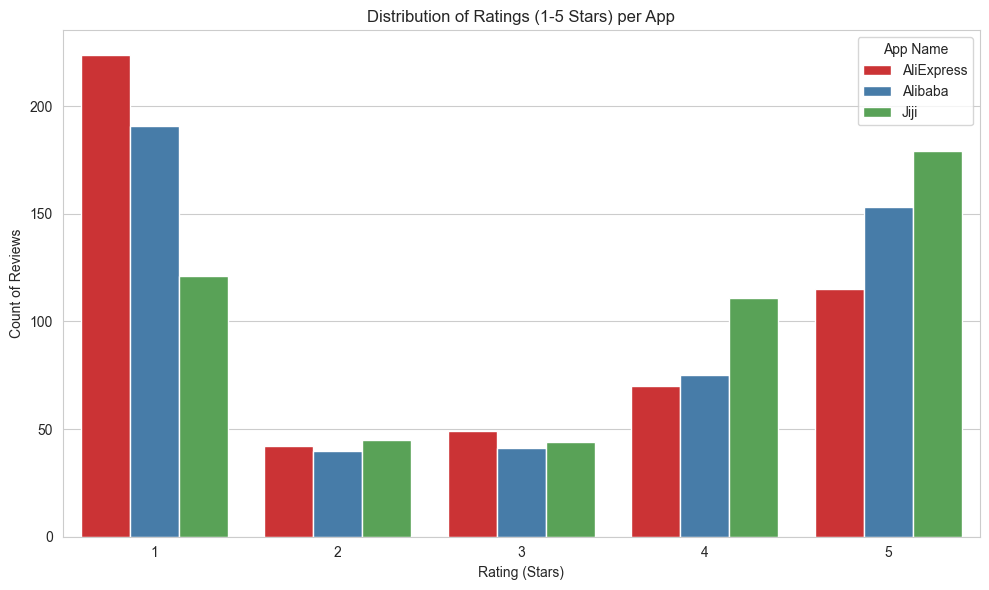


Average Rating per App:
AppName
Jiji          3.364
Alibaba       2.918
AliExpress    2.620
Name: Rating, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1507971817.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




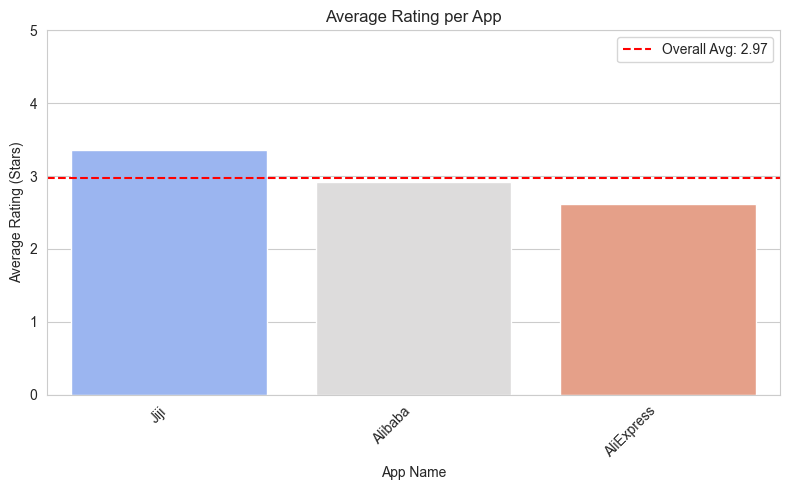

In [5]:
# Cell 4: Rating Distribution Analysis
print("\n--- Rating Distribution Analysis ---")

# 1. Overall Rating Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rating', hue='AppName', palette='Set1')
plt.title('Distribution of Ratings (1-5 Stars) per App')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count of Reviews')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 2. Average Rating per App
avg_ratings = df.groupby('AppName')['Rating'].mean().sort_values(ascending=False)
print("\nAverage Rating per App:")
print(avg_ratings)

# Bar chart for average rating
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_ratings.index, y=avg_ratings.values, palette='coolwarm')
plt.title('Average Rating per App')
plt.xlabel('App Name')
plt.ylabel('Average Rating (Stars)')
plt.ylim(0, 5) # Ratings are between 1 and 5
plt.axhline(y=df['Rating'].mean(), color='red', linestyle='--', label=f'Overall Avg: {df["Rating"].mean():.2f}')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Interpretation of Rating Distribution Analysis 
1. Overall Rating Distribution (Histograms per App) 

The first chart shows the distribution of ratings (1-5 stars) for each app: AliExpress, Alibaba, and Jiji. Here’s what we observe: 

    AliExpress: 
        Rating 1: A significant number of reviews are rated as 1-star, indicating a high proportion of very dissatisfied users.
        Rating 5: There is also a notable peak at 5 stars, suggesting that some users are extremely satisfied with AliExpress.
        Middle Ratings (2-4): Fewer reviews fall in the middle range, which suggests polarized opinions among users.
         

    Alibaba: 
        Rating 1: Similar to AliExpress, there is a substantial number of 1-star reviews, indicating dissatisfaction.
        Rating 5: Alibaba has fewer 5-star reviews compared to AliExpress, suggesting slightly less extreme positive feedback.
        Middle Ratings (2-4): Like AliExpress, Alibaba also shows fewer reviews in the middle range, reinforcing the idea of polarized user sentiment.
         

    Jiji: 
        Rating 1: Jiji has the lowest number of 1-star reviews among the three apps, indicating relatively fewer extremely dissatisfied users.
        Rating 5: Jiji has the highest number of 5-star reviews, suggesting a higher proportion of extremely satisfied users compared to the other two apps.
        Middle Ratings (2-4): Jiji shows a more balanced distribution across the middle ratings (2-4), indicating a broader range of user experiences.
         
     

Key Observations: 

    Polarization: Both AliExpress and Alibaba exhibit highly polarized rating distributions, with significant peaks at both ends (1-star and 5-star). This suggests that users either love or hate these apps.
    Balanced Feedback: Jiji shows a more balanced distribution, with fewer extreme ratings and more reviews falling in the middle range (2-4 stars).
     

2. Average Rating per App 

The second chart displays the average rating for each app, along with an overall average rating across all apps (2.97): 

    Jiji: Average rating = 3.364 (highest among the three apps).
    Alibaba: Average rating = 2.918 (close to the overall average).
    AliExpress: Average rating = 2.620 (lowest among the three apps).
     

Insights (Refined): 

    Jiji Leads: Jiji has the highest average rating (3.364), indicating it generally receives the best feedback from users compared to AliExpress and Alibaba.
    Alibaba in the Middle: Alibaba's average rating (2.918) places it between Jiji and AliExpress, roughly aligning with the overall average.
    AliExpress Trails: AliExpress has the lowest average rating (2.620). However, as noted, this lower score must be considered in the context of its recent entry into the market (scraped data shows minimal activity before 2023, with a major surge starting in 2024).
     

Considering App Age: 

    Established Apps (Alibaba, Jiji): Having been available longer, these apps have likely had more time to refine their offerings, address major initial issues, and build a more stable (though perhaps polarized, as seen in the distribution) user base. Their average ratings reflect a longer-term accumulation of user experiences, including both early struggles and later improvements.
    New Entrant (AliExpress - in this dataset): The data strongly suggests AliExpress has a much shorter history within the scope of this dataset. The influx of reviews starting significantly in 2024 and peaking in 2025 coincides with its lower average rating. This could imply several things:
        Growing Pains: As a newer or recently re-promoted player, AliExpress might be experiencing "growing pains." Early users during this resurgence phase might encounter bugs, new logistical challenges, or unmet expectations related to the initial rollout or relaunch efforts.
        Critical Early Adopters: The users trying the app during its rapid growth phase might be more critical or vocal about initial shortcomings, leading to a higher proportion of lower ratings early on.
        Different User Base/Market Entry: AliExpress might be targeting a different segment or entering a market where user expectations or competition dynamics are particularly challenging, resulting in lower initial satisfaction scores compared to the established players in this dataset.
         
     

Conclusion on Rating: 

While AliExpress undeniably has the lowest average rating, attributing this solely to inferior quality might be premature. Its status as a recent entrant or relaunch in this market (based on review volume trends) is a crucial factor. Its lower average rating likely reflects the challenges and initial user experiences associated with this recent phase of market entry, rather than a long-term assessment of its overall quality compared to more established apps like Alibaba and Jiji. As it matures and addresses early feedback, its average rating could potentially evolve. 

 
Key Takeaways from Rating Distribution Analysis 

    User Sentiment Polarization: 
        AliExpress and Alibaba: Both apps show highly polarized user sentiment, with significant numbers of both 1-star and 5-star reviews. This indicates that users have strong opinions about these apps, either extremely positive or extremely negative.
        Jiji: In contrast, Jiji exhibits a more balanced distribution of ratings, suggesting a wider range of user experiences and fewer extremes.
         

    Relative Performance: 
        Jiji Leads: Jiji has the highest average rating (3.364), indicating it performs best among the three apps in terms of overall user satisfaction.
        AliExpress Trails: AliExpress has the lowest average rating (2.620), suggesting it faces more criticism from users compared to the other two apps.
        Alibaba in Between: Alibaba's average rating (2.918) places it in the middle, slightly below the overall average but closer to Jiji than AliExpress.
         

    Potential Areas for Improvement: 
        AliExpress and Alibaba: Given their polarization, both apps might benefit from addressing specific pain points that drive 1-star reviews while maintaining features that attract 5-star reviews.
        Jiji: While Jiji performs well overall, understanding the reasons behind its lower 1-star reviews could help further improve user satisfaction.
         
     

# Analysis 3: Review Length Analysis 

The length of a user review can often provide indirect insights into the depth of the user's experience, their level of engagement, or the intensity of their feelings (either positive or negative). Analyzing review length helps us understand not just what users are saying, but also how much they are saying and under what circumstances. 

In this section, we will examine the ReviewWordCount feature (calculated during data cleaning) to understand the distribution and characteristics of review lengths across the three apps and in relation to star ratings. 

We will perform the following analyses: 

    Distribution of Review Lengths (Word Count): We will plot histograms (with Kernel Density Estimation curves) to visualize the distribution of the number of words in reviews for each app separately. This will help us answer: 
        What is the typical length of a review for each app?
        Are the distributions similar or different (e.g., does one app tend to have consistently longer or shorter reviews)?
        Are the distributions skewed (e.g., mostly short reviews with a few very long ones)?
         

    Review Length by Rating: We will use boxplots to compare the distribution of review word counts across different star ratings (1 to 5) for each app. This aims to uncover potential relationships such as: 
        Do users tend to write longer reviews when they are extremely satisfied (5 stars) or extremely dissatisfied (1 star)?
        Is there a general trend where higher or lower ratings correlate with longer reviews?
        Do these patterns differ between the apps?
         

    Summary Statistics: We will generate descriptive statistics (mean, median, standard deviation, min, max, quartiles) for ReviewWordCount grouped by AppName. This provides numerical summaries to complement the visualizations. 
     


--- Review Length Analysis ---


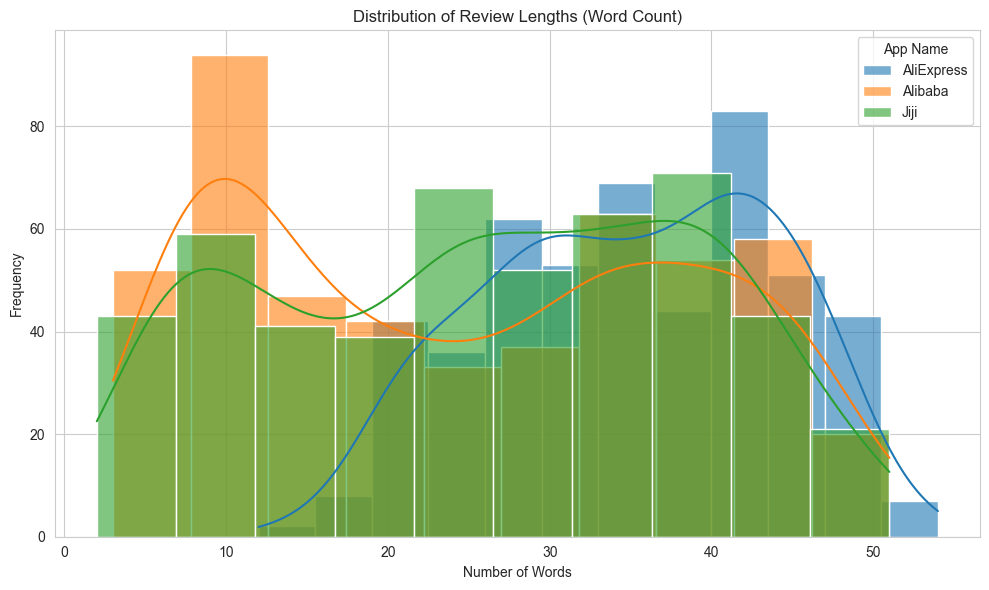

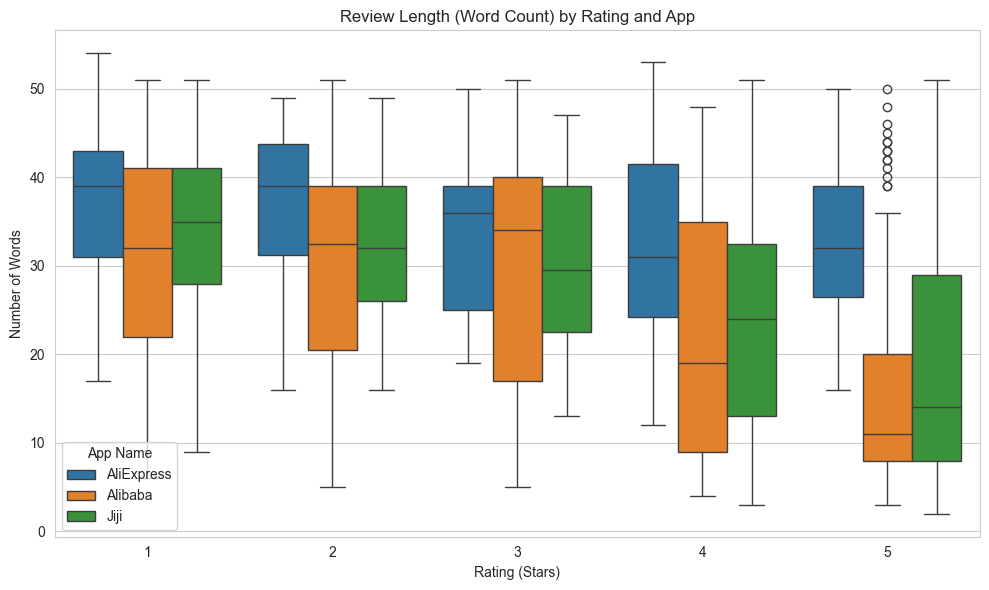


Review Length Summary Statistics:
            count    mean        std   min   25%   50%   75%   max
AppName                                                           
AliExpress  500.0  34.958   8.884487  12.0  28.0  36.0  42.0  54.0
Alibaba     500.0  24.934  13.905408   3.0  11.0  25.0  37.0  51.0
Jiji        500.0  25.962  13.073116   2.0  14.0  26.5  37.0  51.0


In [6]:
# Cell 5: Review Length Analysis
print("\n--- Review Length Analysis ---")

# Ensure ReviewWordCount exists (it was created in Phase 3)
# If not, uncomment the next line:
#df['ReviewWordCount'] = df['CleanedReviewText'].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# 1. Distribution of Review Lengths (Word Count)
plt.figure(figsize=(10, 6))
for app in df['AppName'].unique():
    subset = df[df['AppName'] == app]
    sns.histplot(subset['ReviewWordCount'], kde=True, label=app, alpha=0.6)
plt.title('Distribution of Review Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 2. Review Length by Rating
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='ReviewWordCount', hue='AppName')
plt.title('Review Length (Word Count) by Rating and App')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Words')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# 3. Summary Statistics
print("\nReview Length Summary Statistics:")
print(df.groupby('AppName')['ReviewWordCount'].describe())

# Interpretation of Review Length Analysis 
1. Distribution of Review Lengths (Word Count) 

The first chart shows the distribution of review lengths (word count) for each app: 

    Observations: 
        1. Distribution of Review Lengths (Word Count) 

    AliExpress:
        Bimodal (peaks ~10 words, ~45 words).
        Basic Insight: This indicates two common ways users engage with leaving feedback on AliExpress.
        Additional Insight: The gap between peaks (20-40 words) suggests fewer users find a "middle ground" length sufficient. The high frequency at ~45 words might indicate a common length for detailed complaints or specific praise. The peak at ~10 words is typical for quick sentiments ("Good", "Bad shipping"). This bimodal nature could be investigated further: Are short reviews mostly positive? Are long reviews mostly negative? Does topic (e.g., shipping vs. price) influence length?
         
    Alibaba:
    Peak ~30-40 words.
        Basic Insight: Users tend to write moderately detailed reviews.
        Additional Insight: The broad peak suggests a standard behavior – users generally provide enough detail to explain their rating without being excessively verbose. This consistency might reflect a more mature user base with established expectations for review detail.
         
    Jiji:
    Flatter distribution, peak ~30-40 words, consistent frequency.
        Basic Insight: More variability in how much users write.
        Additional Insight: The flatter curve suggests less consensus on review length. This could mean users have diverse motivations or levels of engagement. It might also reflect a different user demographic or communication style on this platform compared to the others.
         
     
         
     

2. Review Length by Rating (Boxplots) 

The second chart shows how review length varies by star rating for each app: 
    AliExpress:
    Relatively consistent median length across ratings, with 1-star and 4-star being longer.
        Basic Insight: Length isn't strongly dictated by rating level alone.
        Additional Insight (Professional): This is a nuanced finding. It suggests that extreme opinions (very negative - 1 star, or somewhat negative but not worst - 4 star) on AliExpress prompt users to elaborate. The fact that 4-star reviews are long is unusual. Hypothesis: Are 4-star reviews often constructive feedback ("Good, but X needs improvement")? Why are 2 and 3-star reviews shorter? Are they more ambiguous or less motivated to write? This pattern is worth highlighting as it deviates from the norm.
         
    Alibaba:
    Median length decreases as rating increases (longer for 1-star, shorter for 5-star).
        Basic Insight: This follows the common pattern where dissatisfaction drives longer explanations.
        Additional Insight: This is the "textbook" behavior. It suggests users write longer reviews to justify a low rating (explain the problem) but are more concise when simply stating they are happy.
         
    Jiji:
    Similar pattern to Alibaba (longer for low ratings, shorter for high).
        Basic Insight: Also follows the common pattern of dissatisfaction correlating with length.
        Additional Insight: The consistency with Alibaba reinforces that this is a standard user behavior. The slightly less pronounced difference compared to Alibaba (as you noted) might mean Jiji users are slightly less driven to write very long complaints or very short praises compared to Alibaba users.
         
     
     

3. Summary Statistics
   
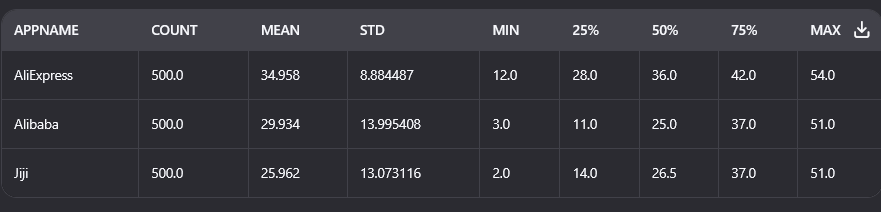
    Key Observations: 
        AliExpress: Has the highest average review length (mean = 34.958 words) among the three apps.
        Alibaba: Follows closely with an average review length of 29.934 words.
        Jiji: Has the shortest average review length (25.962 words).
         

        Additional Insight: Combining this with the bimodal distribution: AliExpress not only has longer average reviews, but also has a distinct group writing very short ones. The lower standard deviation for AliExpress (compared to others) means that within its two groups (short/long), the lengths are surprisingly consistent. Alibaba and Jiji, with higher standard deviations, show more variation within their general tendency towards moderate lengths.
     
Key Takeaway: 

Your analysis correctly identifies the core patterns. The most professionally interesting point is the unique behavior of AliExpress regarding review length: 

    It has the longest average reviews.
    Its review length distribution is bimodal, unlike the others.
    Its relationship between length and rating is non-standard, with moderate dissatisfaction (4-star) prompting long reviews, not just extreme dissatisfaction (1-star).
     

These findings suggest AliExpress users might have distinct motivations for leaving feedback or that the app's recent surge (as seen in previous analyses) is attracting users who either quickly like/dislike something or feel compelled to give detailed feedback, even for middling experiences. This is a valuable insight that sets AliExpress apart from the other two apps in terms of user engagement style. 
     

 

         
     

 

# Analysis 4: Common Words/N-grams Analysis 

Text data is rich in information, but understanding it requires identifying the most frequently discussed topics or terms. This analysis focuses on uncovering the most common words and phrases within the reviews for each app. By examining these frequent terms, we can gain initial insights into what users are talking about most when they review AliExpress, Alibaba, and Jiji. 

We will employ two primary techniques: 

    N-gram Analysis: We will use scikit-learn's CountVectorizer to systematically count the occurrences of words and phrases. 
        Unigrams (1-grams): Individual words (e.g., "shipping", "price", "good"). This helps identify the most common single terms.
        Bigrams (2-grams): Pairs of consecutive words (e.g., "good price", "bad shipping", "easy return"). This provides context and can reveal common two-word concepts or phrases users employ.
        (Trigrams (3-grams) are optional but can be noisy; we might consider them later if interesting patterns emerge in bigrams).
        We will generate separate bar charts showing the Top 15 Unigrams and Top 15 Bigrams for each app (AliExpress, Alibaba, Jiji). This allows for direct comparison of the dominant single words and two-word phrases across the platforms.
         

    Word Clouds: We will create visual word clouds for each app. Word clouds provide an intuitive, visual representation where the size of each word corresponds to its frequency in the reviews for that specific app. This complements the bar charts by offering a quick, holistic view of prominent terms. 
     

The goal of this analysis is to move beyond numerical ratings and start identifying the actual topics and language associated with user experiences on each e-commerce platform. What are the key words that define the conversation around AliExpress versus Alibaba versus Jiji? 


--- Common Words/N-grams Analysis ---

Analyzing AliExpress...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




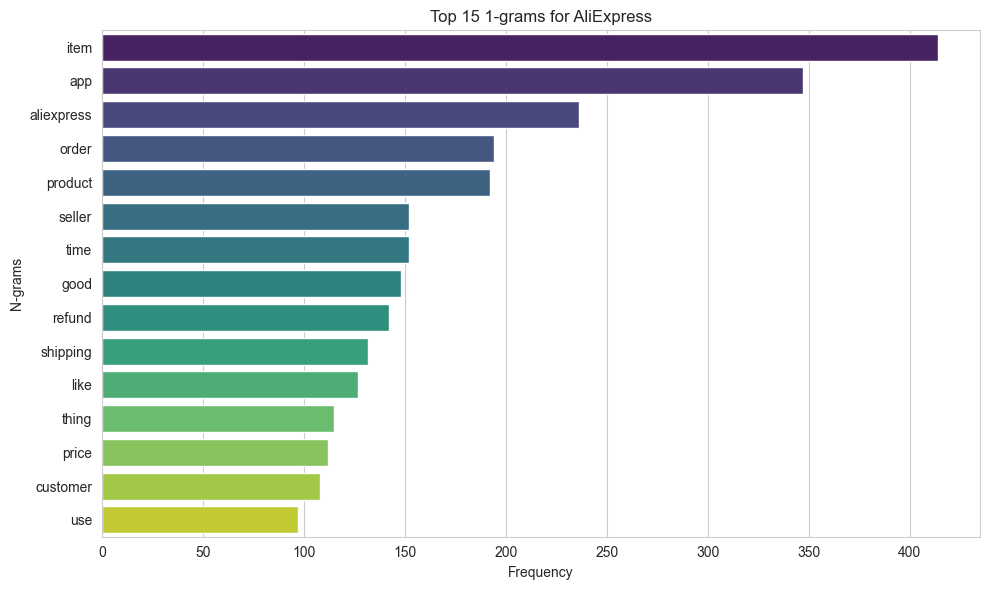

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




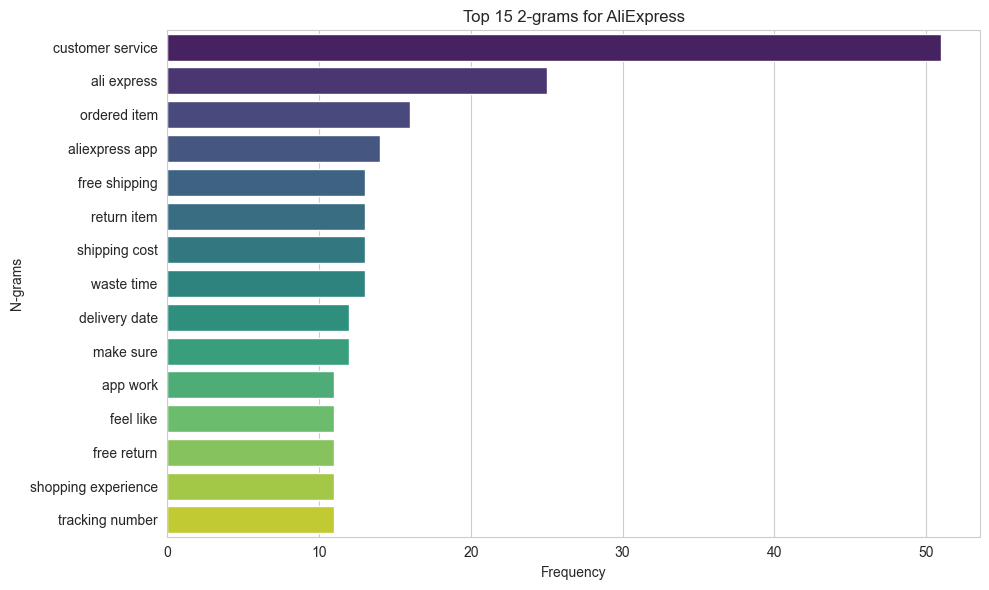


Analyzing Alibaba...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




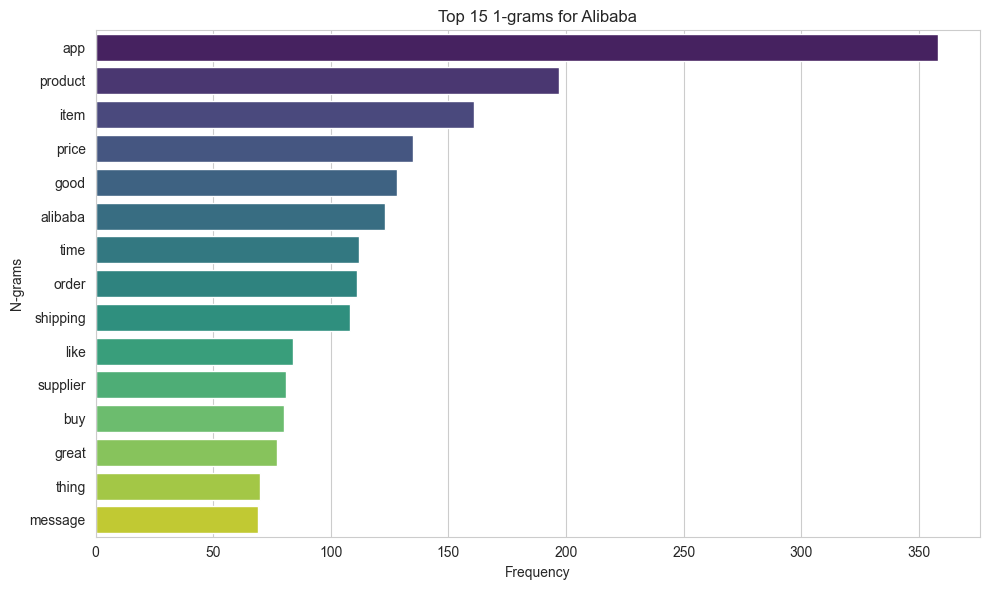

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




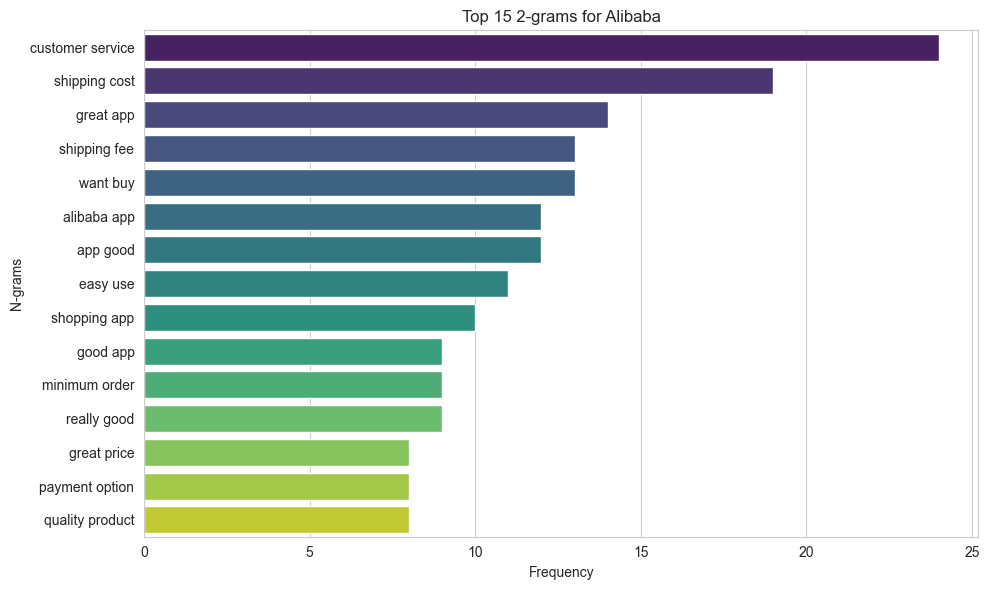


Analyzing Jiji...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




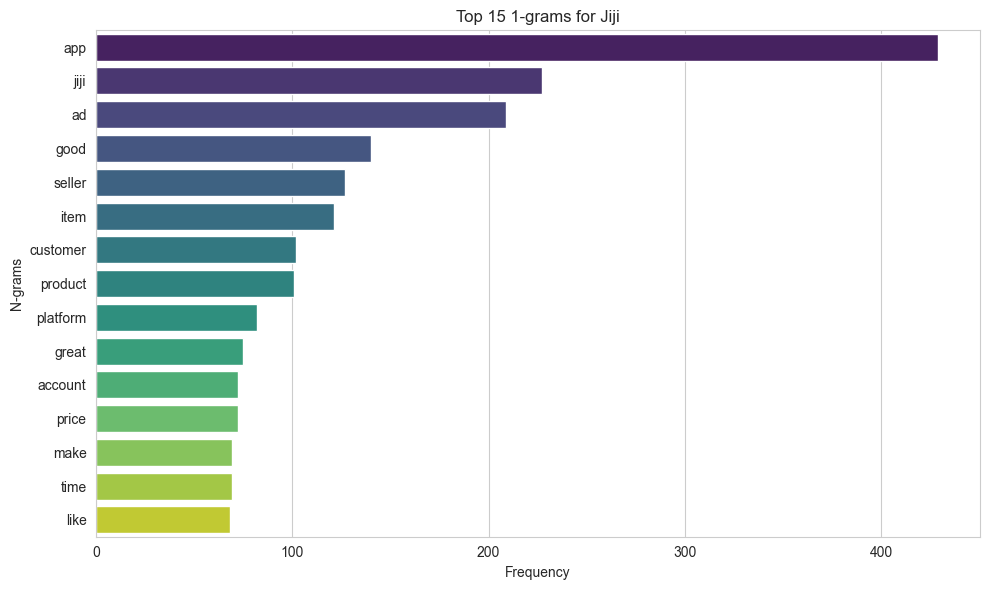

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\956350872.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




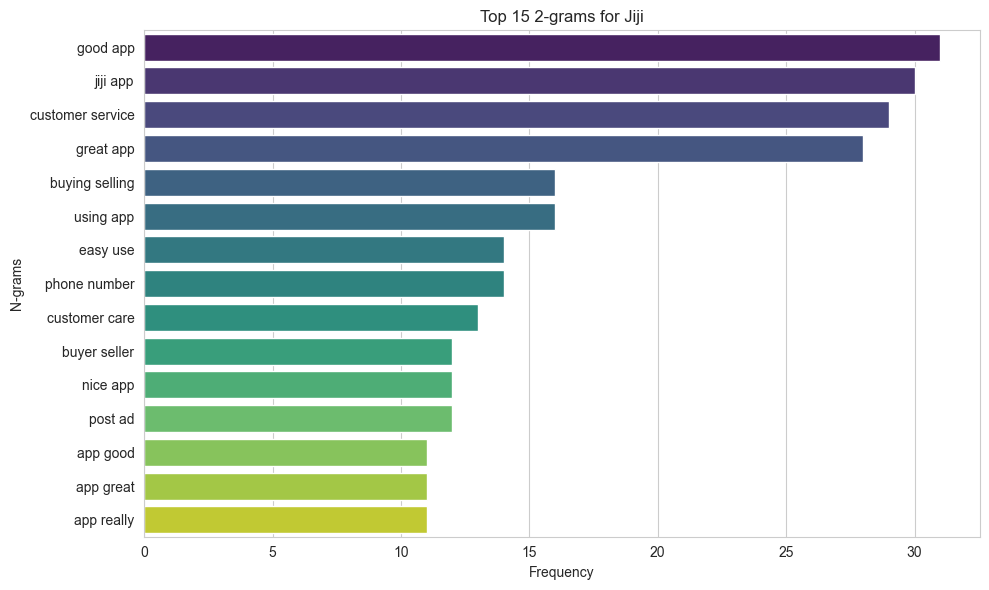


Generating Word Cloud for AliExpress...


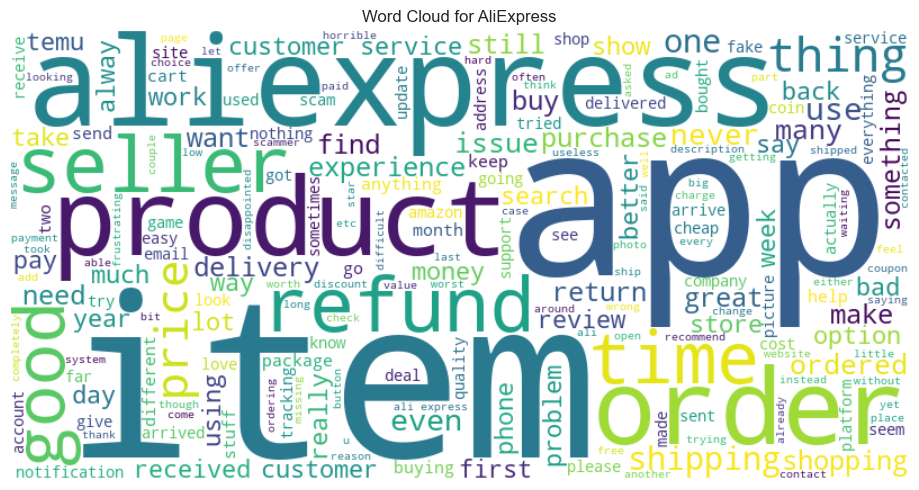


Generating Word Cloud for Alibaba...


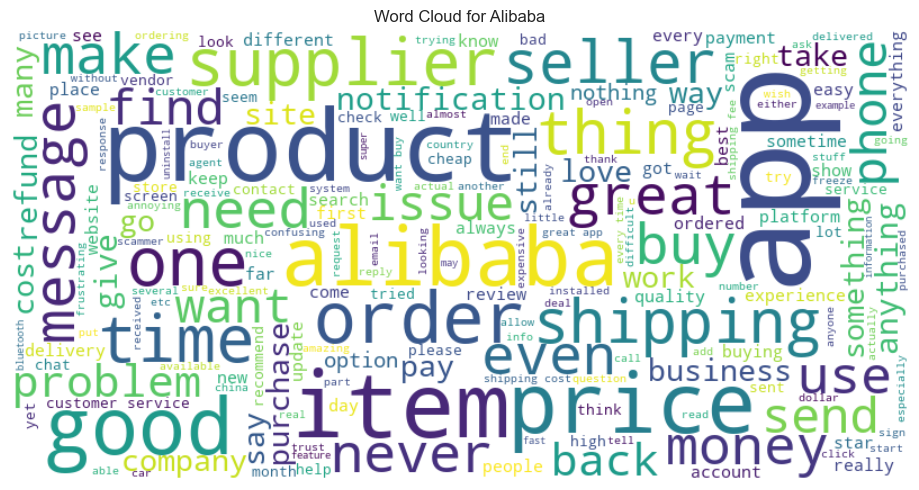


Generating Word Cloud for Jiji...


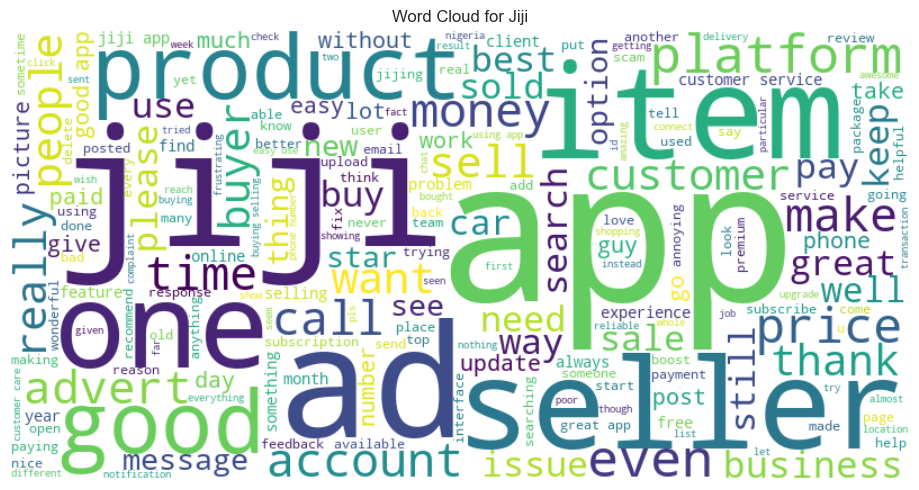

In [7]:
# Cell 6: Common Words/N-grams Analysis
print("\n--- Common Words/N-grams Analysis ---")

from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(app_name, ngram_range=(1, 1), top_n=20):
    """Helper function to plot top n-grams for a specific app."""
    app_df = df[df['AppName'] == app_name]
    # Use CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=1000, stop_words='english')
    try:
        X = vectorizer.fit_transform(app_df['CleanedReviewText'].dropna()) # Drop NaNs
        # Sum counts for each feature (n-gram)
        sums = np.array(X.sum(axis=0)).flatten()
        ngram_counts = dict(zip(vectorizer.get_feature_names_out(), sums))
        # Get top N
        top_ngrams = Counter(ngram_counts).most_common(top_n)

        if top_ngrams:
            ngrams_list, counts_list = zip(*top_ngrams) # Unpack tuples
            plt.figure(figsize=(10, 6))
            sns.barplot(x=list(counts_list), y=list(ngrams_list), palette='viridis')
            plt.title(f'Top {top_n} {ngram_range[0]}-grams for {app_name}')
            plt.xlabel('Frequency')
            plt.ylabel('N-grams')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No n-grams found for {app_name} with range {ngram_range}.")

    except ValueError as e:
        print(f"ValueError for {app_name} ngrams {ngram_range}: {e}") # E.g., empty vocabulary
    except Exception as e:
         print(f"An error occurred during n-gram analysis for {app_name}: {e}")


# Analyze for each app
for app in df['AppName'].unique():
    print(f"\nAnalyzing {app}...")
    # Unigrams (Single Words)
    plot_top_ngrams(app, ngram_range=(1, 1), top_n=15)
    # Bigrams (Two Words)
    plot_top_ngrams(app, ngram_range=(2, 2), top_n=15)
    # Trigrams (Three Words) - Optional, can be noisy
    # plot_top_ngrams(app, ngram_range=(3, 3), top_n=15)

# --- Optional: Word Clouds ---
def create_wordcloud(app_name):
    """Creates a word cloud for a specific app."""
    app_text = " ".join(df[df['AppName'] == app_name]['CleanedReviewText'].dropna().tolist())
    if not app_text.strip():
        print(f"No text available for word cloud for {app_name}.")
        return

    try:
        wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(app_text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for {app_name}')
        plt.tight_layout()
        plt.show()
    except Exception as e:
         print(f"Error creating word cloud for {app_name}: {e}")

# Generate word clouds
for app in df['AppName'].unique():
    print(f"\nGenerating Word Cloud for {app}...")
    create_wordcloud(app)

#  Interpretation of Common Words/N-grams Analysis 

This section identifies the most frequently occurring single words (unigrams) and two-word phrases (bigrams) in the reviews for each app (AliExpress, Alibaba, Jiji). By analyzing these terms, we gain insights into the key topics and language users employ when discussing their experiences with these e-commerce platforms. 
Key Findings: 

    Dominant Themes Across Apps: 
        Core E-commerce Terms: Words like product, item, price, order, refund, and seller are consistently prominent across all three apps. These terms reflect fundamental aspects of e-commerce such as products, pricing, transactions, and seller interactions.
        App-Specific Mentions: Each app has its name (aliexpress, alibaba, jiji) appearing as a dominant term, indicating users frequently mention the app name when discussing their experiences.
        Sentiment Indicators: Positive terms like good, great, and easy coexist with negative terms like refund, problem, and scam, suggesting mixed user experiences.
         

    Specific App Insights: 
    AliExpress: 
        Dominant Themes:
            Product and Refunds: The high frequency of product, refund, and problem suggests users often discuss specific items and issues related to refunds or order problems.
            Time Sensitivity: The term time appears prominently, likely referring to shipping delays or response times.
            Mixed Sentiment: While positive terms like good and great are present, negative terms like refund and problem indicate ongoing challenges.
             
        Word Cloud Insight: The word cloud reinforces the mixed sentiment, with prominent terms like refund, problem, and scam alongside positive terms like good and great.
         
    Alibaba: 
        Dominant Themes:
            Brand Recognition: The large size of alibaba in the word cloud reflects strong brand visibility.
            Price Sensitivity: The prominence of price and money suggests users are highly sensitive to pricing.
            Transaction Focus: Words like order, purchase, and payment indicate discussions around transactions.
            Mixed Sentiment: Both positive (good, great) and negative (scam, problem) terms appear, indicating varied experiences.
             
        Word Cloud Insight: The word cloud highlights the balance between positive (good, great) and negative (scam, problem) terms, reinforcing the mixed sentiment.
         
    Jiji: 
        Dominant Themes:
            Platform Focus: The high frequency of platform and app suggests users often discuss the app's functionality and overall experience.
            Sellers and Buyers: Words like seller and buyer indicate active engagement with the marketplace.
            Pricing Concerns: The term price is prominent, reflecting sensitivity to costs.
            Positive Sentiment: Words like good, great, and best dominate, indicating overall satisfaction.
             
        Word Cloud Insight: The word cloud emphasizes the app's functionality (platform, app) and positive sentiment (good, great, best), suggesting a relatively smooth user experience.

# Analysis 5: Basic Sentiment Overview using VADER 

While star ratings (Rating) provide a quantitative measure of user satisfaction, they don't capture the nuance and emotional tone expressed in the written review text itself. A 3-star rating could be given for vastly different reasons, and the text might reveal frustration, mild contentment, or even sarcasm. 

This analysis aims to quantify the sentiment expressed in the CleanedReviewText using a pre-built Natural Language Processing (NLP) tool. We will employ the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis model. 

Why VADER? 

    VADER is specifically designed for social media text, which includes informal language, slang, and punctuation used for emphasis – characteristics often found in app reviews.
    It provides a continuous compound score ranging from -1 (most negative) to +1 (most positive), offering more granularity than a simple positive/negative classification.
    It also provides separate scores for positive, negative, and neutral sentiment, which we will use to classify each review into a categorical label.
     

Analysis Steps: 

    Sentiment Scoring: We will apply the VADER analyzer to each review's CleanedReviewText to calculate a VADER_Score (the compound score).
    Sentiment Classification: Based on the VADER_Score, we will classify each review into one of three categories:
        Positive: VADER_Score >= 0.05
        Negative: VADER_Score <= -0.05
        Neutral: -0.05 < VADER_Score < 0.05
        This creates a new column VADER_Sentiment.
         
    Sentiment Distribution per App: We will count how many reviews fall into each sentiment category (Positive, Negative, Neutral) for each app (AliExpress, Alibaba, Jiji) and visualize this using a stacked bar chart. This allows direct comparison of sentiment "health" across the platforms.
    Average Sentiment Score per App: We will calculate the mean VADER_Score for each app. This provides a single numerical summary of the overall sentiment tone for each platform, which we will visualize and compare.
    Sentiment Trend Over Time: We will analyze how the distribution of sentiment categories (Positive, Negative, Neutral) has changed over time (monthly) for each app. This line chart will help identify periods of shifting user mood.
    Sentiment vs. Rating Correlation: We will visualize the relationship between the user-provided star Rating and the computed VADER_Score using boxplots. We will also calculate the correlation coefficient. This is crucial to validate our sentiment analysis: do higher star ratings generally correspond to higher VADER scores?
     

This analysis bridges the gap between the structured numerical rating data and the unstructured text data, providing a richer understanding of user feelings and validating the consistency between explicit ratings and implicit sentiment in the text.


--- Basic Sentiment Overview ---
Sentiment Distribution per App:
VADER_Sentiment  Negative  Neutral  Positive
AppName                                     
AliExpress            189       15       296
Alibaba               134       22       344
Jiji                   98       11       391


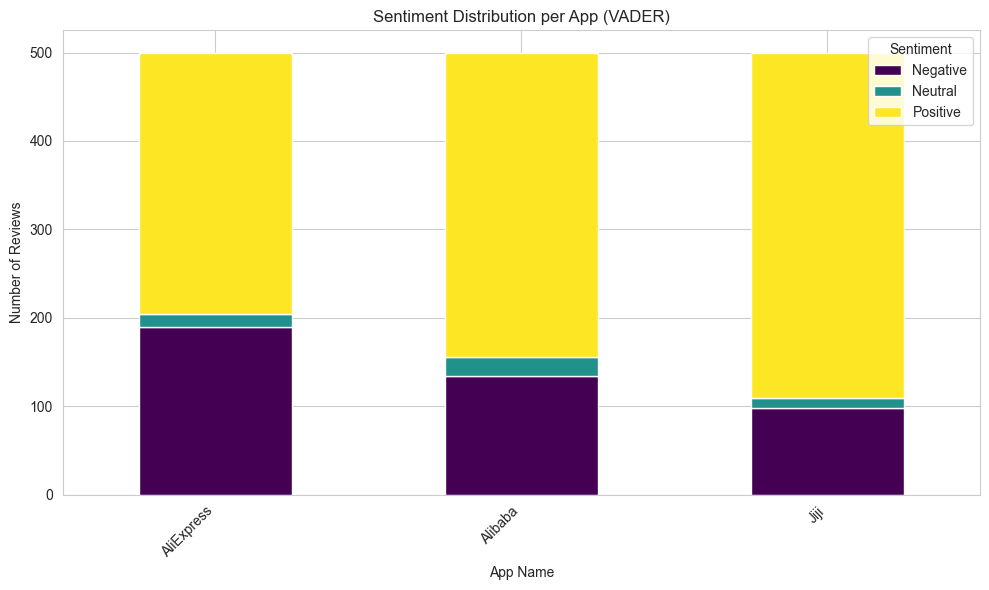


Average VADER Sentiment Score per App:
AppName
Jiji          0.434699
Alibaba       0.309090
AliExpress    0.196143
Name: VADER_Score, dtype: float64


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\3158387937.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




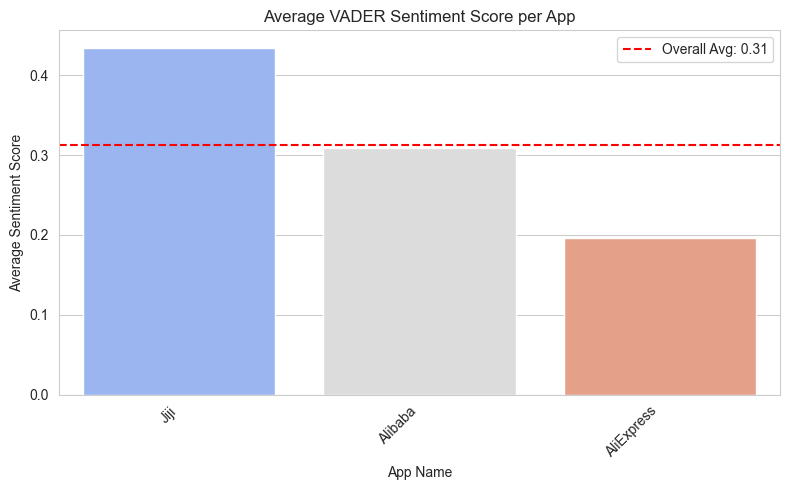

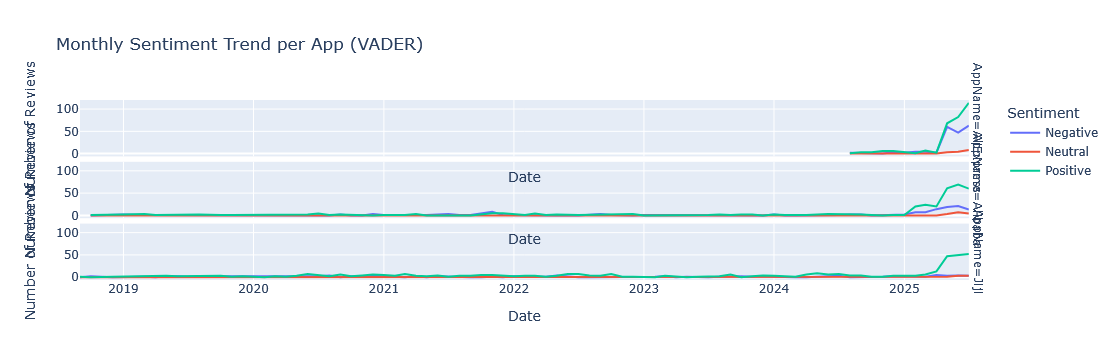

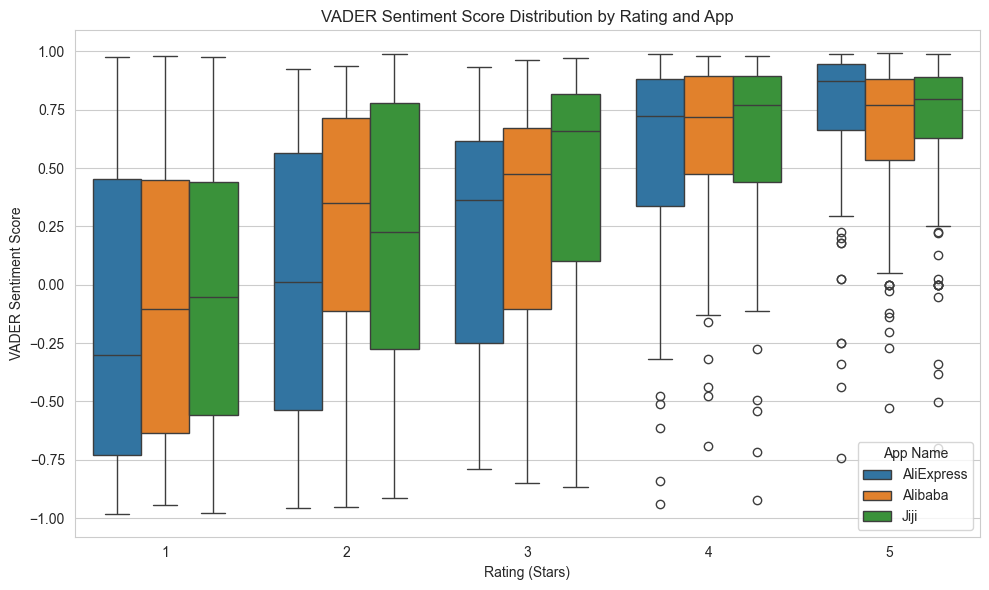


Correlation between Rating and VADER Sentiment Score:
               Rating  VADER_Score
Rating       1.000000     0.574705
VADER_Score  0.574705     1.000000


In [8]:
# Cell 7: Basic Sentiment Overview using VADER
print("\n--- Basic Sentiment Overview ---")

# Initialize VADER analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_vader_score(text):
    if not isinstance(text, str) or not text.strip():
        return 0 # Neutral score for missing/empty text
    scores = analyzer.polarity_scores(text)
    return scores['compound'] # Compound score is the overall sentiment (-1 to 1)

# Apply VADER to CleanedReviewText
df['VADER_Score'] = df['CleanedReviewText'].apply(get_vader_score)

# Classify sentiment based on compound score
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['VADER_Sentiment'] = df['VADER_Score'].apply(classify_sentiment)

# 1. Sentiment Distribution per App
sentiment_counts = df.groupby(['AppName', 'VADER_Sentiment']).size().unstack(fill_value=0)
print("Sentiment Distribution per App:")
print(sentiment_counts)

# Stacked Bar Chart
sentiment_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Sentiment Distribution per App (VADER)')
plt.xlabel('App Name')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# 2. Average Sentiment Score per App
avg_sentiment = df.groupby('AppName')['VADER_Score'].mean().sort_values(ascending=False)
print("\nAverage VADER Sentiment Score per App:")
print(avg_sentiment)

# Bar chart for average sentiment
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_sentiment.index, y=avg_sentiment.values, palette='coolwarm')
plt.title('Average VADER Sentiment Score per App')
plt.xlabel('App Name')
plt.ylabel('Average Sentiment Score')
plt.axhline(y=df['VADER_Score'].mean(), color='red', linestyle='--', label=f'Overall Avg: {df["VADER_Score"].mean():.2f}')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Sentiment Trend Over Time (Monthly)
# --- Ensure YearMonth is calculated correctly ---
# Make sure ReviewDate is datetime (should be from loading)
df['ReviewDate'] = pd.to_datetime(df['ReviewDate'])
# Extract Year-Month for grouping (as Period)
df['YearMonth'] = df['ReviewDate'].dt.to_period('M')

# Group by App, YearMonth, and Sentiment
sentiment_trend = df.groupby(['AppName', 'YearMonth', 'VADER_Sentiment']).size().reset_index(name='Count')

# Pivot for easier plotting
pivot_trend = sentiment_trend.pivot_table(index=['AppName', 'YearMonth'], columns='VADER_Sentiment', values='Count', fill_value=0).reset_index()

# Melt for plotting with Plotly
melted_trend = pivot_trend.melt(id_vars=['AppName', 'YearMonth'], var_name='Sentiment', value_name='Count')

# --- FIX: Convert Period to Timestamp for Plotly compatibility ---
# The line below is the crucial fix
melted_trend['YearMonth'] = melted_trend['YearMonth'].dt.to_timestamp()
# --- END OF FIX ---

fig = px.line(melted_trend, x='YearMonth', y='Count', color='Sentiment', facet_row='AppName',
              title='Monthly Sentiment Trend per App (VADER)',
              labels={'YearMonth':'Date', 'Count':'Number of Reviews'})
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Number of Reviews')
fig.show() # This should now work

# 4. Sentiment vs. Rating Correlation
# Box plot or violin plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rating', y='VADER_Score', hue='AppName')
plt.title('VADER Sentiment Score Distribution by Rating and App')
plt.xlabel('Rating (Stars)')
plt.ylabel('VADER Sentiment Score')
plt.legend(title='App Name')
plt.tight_layout()
plt.show()

# Correlation coefficient
print("\nCorrelation between Rating and VADER Sentiment Score:")
print(df[['Rating', 'VADER_Score']].corr())

# Interpretation of Sentiment Analysis Results 

This section uses the VADER sentiment analysis tool to quantify the emotional tone expressed in the review texts for each e-commerce app (AliExpress, Alibaba, Jiji). By calculating continuous sentiment scores (VADER_Score) and classifying them into categorical labels (VADER_Sentiment), we gain deeper insights into user sentiment across the platforms. 
Key Findings: 

    Average VADER Sentiment Score per App: 
        Jiji: Demonstrates the highest overall sentiment, indicating that users generally express more positive emotions in their reviews compared to the other two apps.
        Alibaba: Shows a moderate sentiment score, reflecting a balanced mix of positive and negative feedback.
        AliExpress: Has the lowest sentiment score, suggesting more dissatisfaction or stronger negative feedback among its user base.
        Overall Average Sentiment: The red dashed line shows an overall average sentiment score of 0.31, providing context for how each app compares to the general sentiment across all reviews.
         

    Monthly Sentiment Trend per App (VADER): 
        Jiji and Alibaba: Both show stable sentiment trends over time, with Positive sentiment dominating.
        AliExpress: Exhibits a significant spike in Positive sentiment around late 2025, while Neutral and Negative sentiments remain relatively low. This suggests a potential improvement in user satisfaction or a specific event driving more positive feedback during that period.
         

    VADER Sentiment Score Distribution by Rating and App: 
        Alignment with Star Ratings: Higher star ratings correlate with more positive sentiment scores, and lower ratings correlate with more negative sentiment scores. This confirms the validity of VADER as a sentiment analysis tool.
        App-Specific Patterns: Each app shows similar sentiment distributions across ratings, reinforcing the idea that VADER captures consistent sentiment patterns.
         

    Correlation between Rating and VADER Sentiment Score: 
        The correlation coefficient of 0.57 indicates a moderate positive relationship between star ratings and VADER sentiment scores. As ratings increase, sentiment scores tend to increase as well, though not perfectly linearly.
         
     

Insights and Implications: 

    User Satisfaction Levels: 
        Jiji: Users appear to be the happiest overall, with consistently high Positive sentiment.
        Alibaba: Offers a balanced experience, with mixed but generally positive feedback.
        AliExpress: Recently improved significantly, especially in late 2025, but still lags behind Jiji and Alibaba in overall sentiment.
         

    Temporal Dynamics: 
        Stability: Jiji and Alibaba maintain consistent sentiment trends over time.
        Change: AliExpress shows a notable shift toward more Positive sentiment in late 2025, suggesting a potential turning point in user satisfaction.
         

    Sentiment-Rating Consistency: 
        The moderate correlation (0.57) between ratings and VADER scores confirms that both measures provide complementary insights into user sentiment.
         
     

# Analysis 6: Deep Dive into High-Rating (5-Star) Reviews 

The previous analyses have provided a broad overview of user sentiment and common topics. However, understanding the drivers of extreme satisfaction is equally important. This section focuses specifically on the subset of reviews that received the highest possible rating: 5 stars. 

Purpose: 

The goal is to uncover the specific aspects, features, or experiences that users associate with their most positive feedback. By analyzing only 5-star reviews, we aim to answer: 

    What do users explicitly love about each app (AliExpress, Alibaba, Jiji)?
    Are there distinct reasons why users give the maximum rating to one app versus another?
    What positive themes are most prominent within this highly satisfied user group?
     

Methodology: 

We will apply several focused techniques to the subset of 5-star reviews: 

    Targeted N-gram Analysis: We will identify the most frequent single words (unigrams) and two-word phrases (bigrams) specifically within the 5-star reviews for each app. This helps pinpoint the key terms users associate with their peak satisfaction.
    Thematic Keyword Analysis: We will define categories of positive aspects common in e-commerce (e.g., Price/Value, Product Quality, App Usability, Delivery, Customer Service). We will then count how often keywords related to these themes appear in the 5-star reviews for each app. This provides a structured view of what users praise.
    Sentiment Intensity Check: We will examine the distribution of VADER sentiment scores specifically for these 5-star reviews. This helps us understand if a "5-star" rating consistently reflects extremely positive language or if there's variation in the intensity of positivity.
    (Suggested) Qualitative Sampling: While automated analysis is powerful, manually reading a sample of these 5-star reviews can provide nuanced insights into user language and specific reasons that structured analysis might miss.
     

This deep dive complements the overall sentiment analysis by zooming in on the characteristics that define the best user experiences for each application. 


--- Deep Dive: Analyzing 5-Star Reviews ---
Total 5-star reviews: 447
Distribution across apps:
AppName
Jiji          179
Alibaba       153
AliExpress    115
Name: count, dtype: int64

--- Top N-grams in 5-Star Reviews ---

Analyzing AliExpress (5-Star Reviews)...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




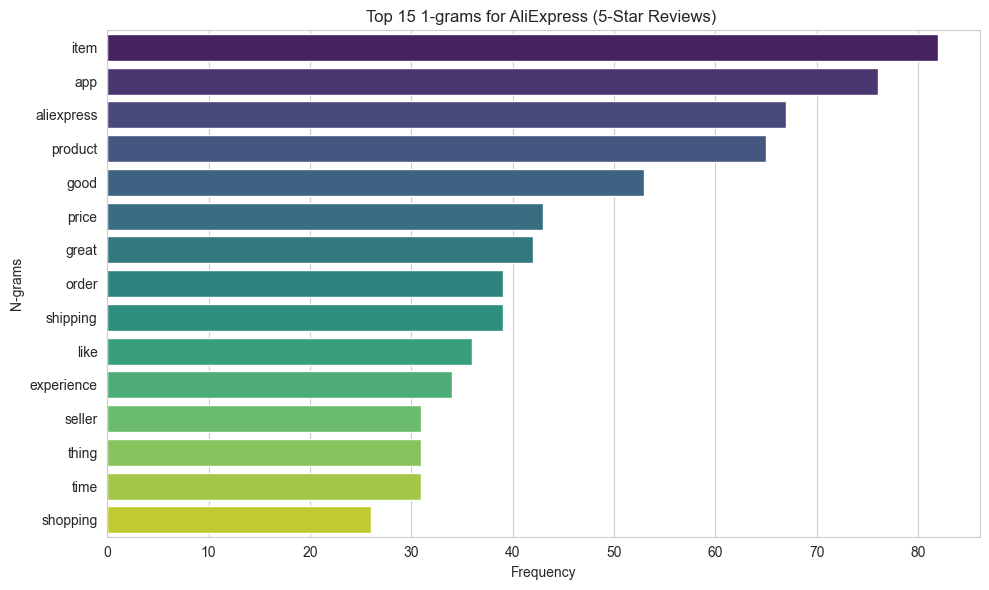

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




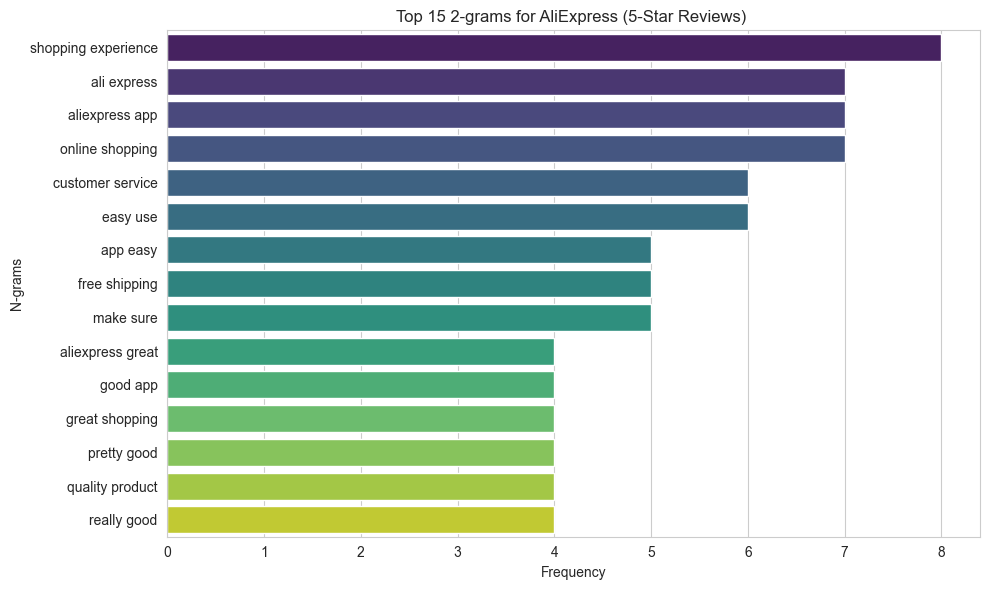


Analyzing Alibaba (5-Star Reviews)...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




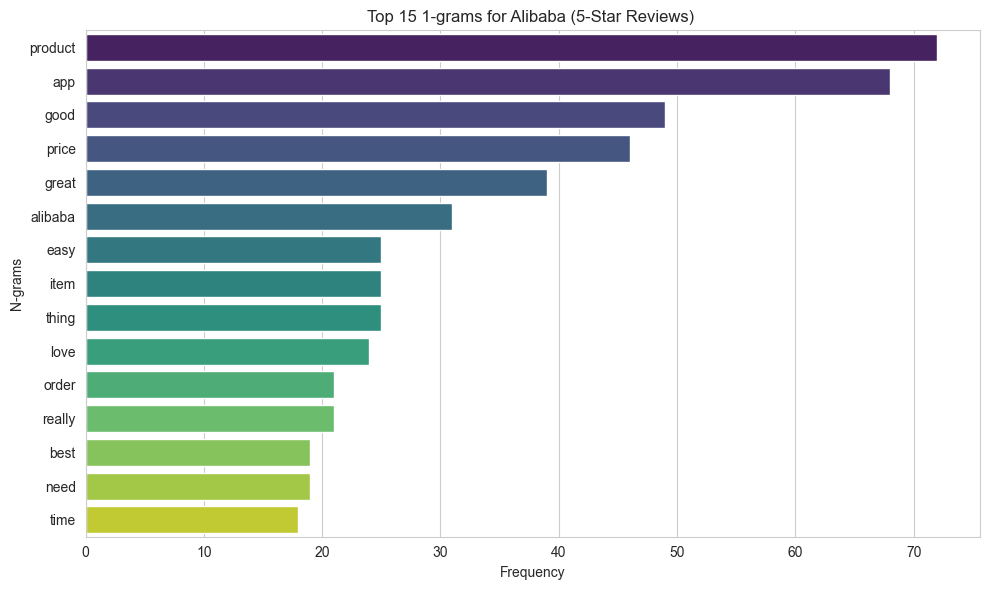

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




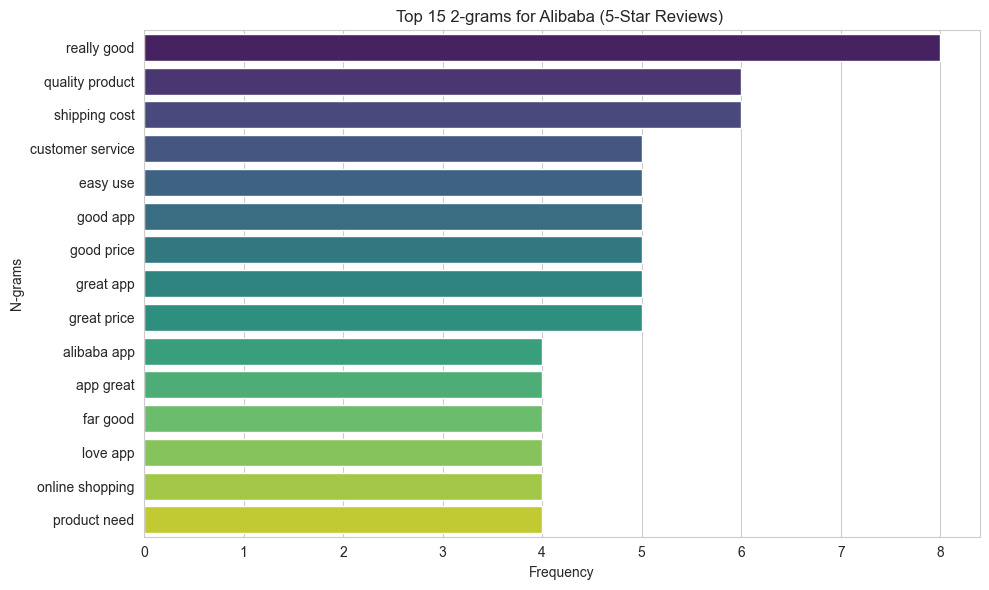


Analyzing Jiji (5-Star Reviews)...


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




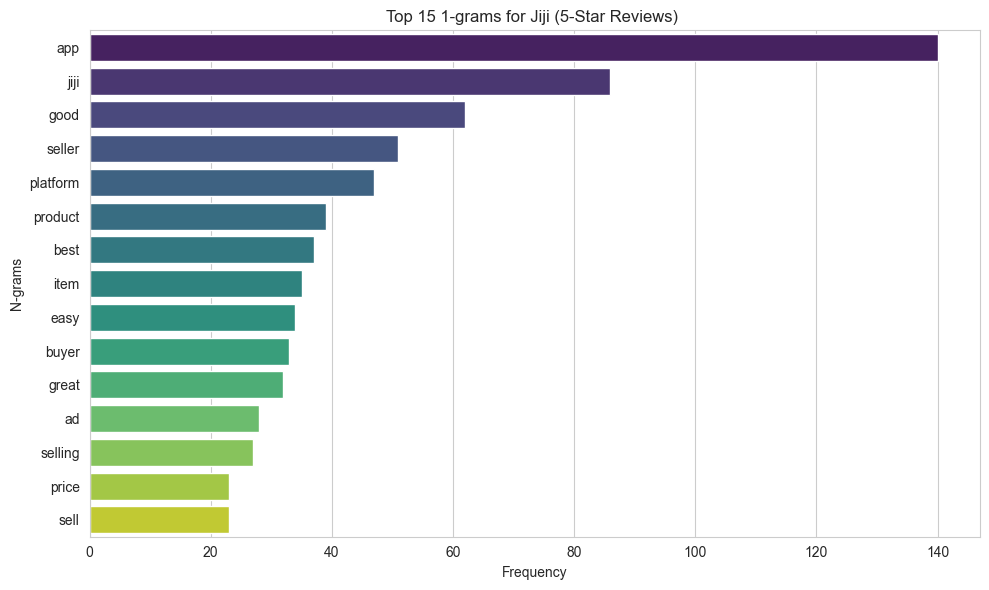

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1792699899.py:39: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




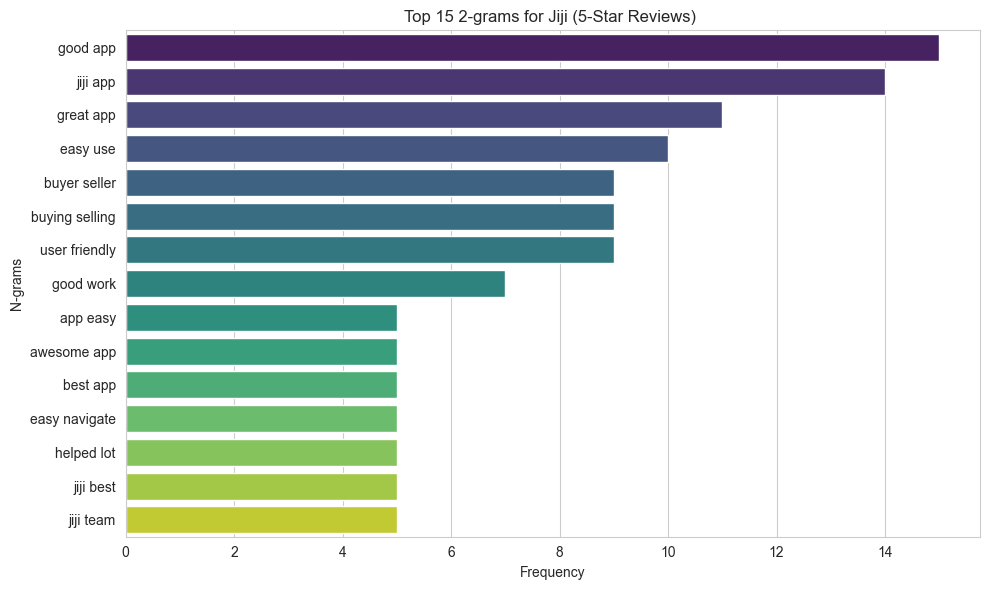


--- Keyword/Theme Analysis for Positive Aspects ---

--- AliExpress - 5-Star Review Themes ---
  App Experience: 51 total mentions
    Top keywords/phrases: [('easy', 21), ('good app', 5), ('quick', 5)]
  Price/Value: 43 total mentions
    Top keywords/phrases: [('cheap', 12), ('worth', 9), ('discount', 8)]
  Product Quality: 42 total mentions
    Top keywords/phrases: [('awesome', 10), ('excellent', 9), ('perfect', 8)]
  Customer Service: 18 total mentions
    Top keywords/phrases: [('customer service', 6), ('helpful', 4), ('responsive', 4)]
  Selection/Variety: 9 total mentions
    Top keywords/phrases: [('variety', 7), ('wide range', 1), ('find anything', 1)]
  Delivery/Shipping: 7 total mentions
    Top keywords/phrases: [('tracking', 6), ('fast delivery', 1), ('fast shipping', 0)]
  Specific Features: 1 total mentions
    Top keywords/phrases: [('wishlist', 1), ('search works', 0), ('filter works', 0)]

--- Alibaba - 5-Star Review Themes ---
  App Experience: 54 total mentions
  

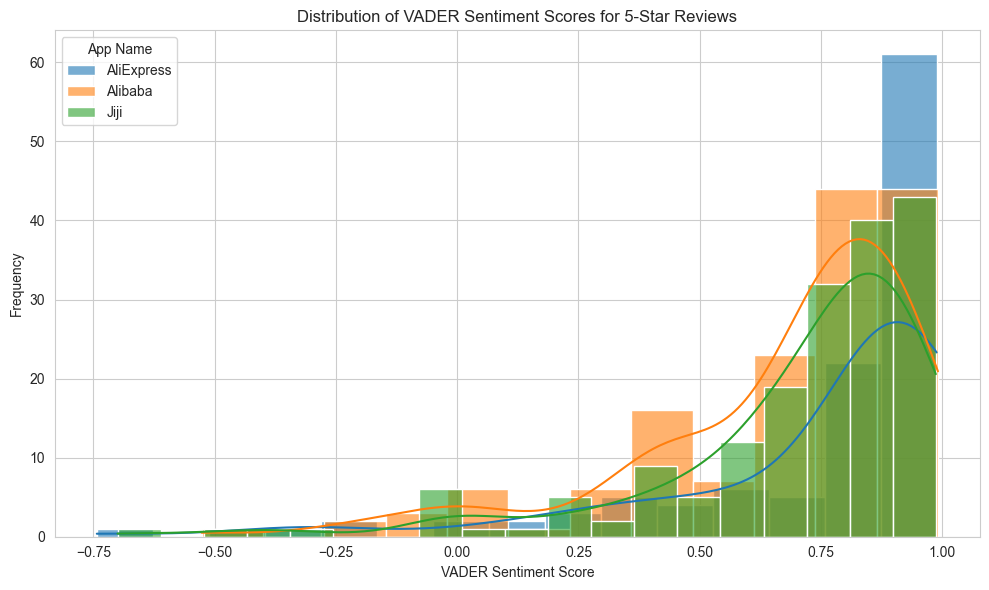


VADER Score Summary for 5-Star Reviews:
            count      mean       std     min      25%     50%     75%     max
AppName                                                                       
AliExpress  115.0  0.739717  0.337938 -0.7430  0.66355  0.8750  0.9445  0.9887
Alibaba     153.0  0.672739  0.292502 -0.5267  0.53670  0.7717  0.8834  0.9914
Jiji        179.0  0.703067  0.294309 -0.7003  0.63090  0.7964  0.8884  0.9870

--- Manual Step Suggestion ---
For deeper qualitative insights:
1. Randomly sample 10-20 5-star reviews for each app.
2. Read the original ReviewText (not cleaned) to understand context and nuance.
3. Look for explicit reasons given for the 5-star rating.
4. Note any direct comparisons made by the user.
You can do this by filtering your DataFrame:
   sample_reviews = df[df['Rating'] == 5][df['AppName'] == 'AliExpress'].sample(10)
   for idx, row in sample_reviews.iterrows():
       print(f"Review ID: {row['ReviewID']}")
       print(f"Text: {row['ReviewText

In [9]:
# --- Deep Dive Analysis: High-Rating (5-Star) Reviews ---
print("\n--- Deep Dive: Analyzing 5-Star Reviews ---")

# 1. Filter the Dataset for 5-Star Reviews
high_rated_reviews = df[df['Rating'] == 5].copy()
print(f"Total 5-star reviews: {len(high_rated_reviews)}")
print("Distribution across apps:")
print(high_rated_reviews['AppName'].value_counts())

# 2. Define Function for Focused N-gram Analysis (Modify existing function slightly)
# We'll reuse the core logic but make it specific to a subset
def plot_top_ngrams_for_subset(data_subset, app_name_filter, ngram_range=(1, 1), top_n=15, title_suffix=""):
    """Helper function to plot top n-grams for a specific subset and app."""
    # Filter for the specific app within the subset
    app_df = data_subset[data_subset['AppName'] == app_name_filter]
    
    if app_df.empty:
        print(f"No data found for {app_name_filter} in the provided subset.")
        return

    # Use CountVectorizer for n-grams
    from sklearn.feature_extraction.text import CountVectorizer
    vectorizer = CountVectorizer(ngram_range=ngram_range, max_features=1000, stop_words='english')
    try:
        X = vectorizer.fit_transform(app_df['CleanedReviewText'].dropna()) # Drop NaNs
        # Sum counts for each feature (n-gram)
        import numpy as np
        sums = np.array(X.sum(axis=0)).flatten()
        ngram_counts = dict(zip(vectorizer.get_feature_names_out(), sums))
        # Get top N
        from collections import Counter
        top_ngrams = Counter(ngram_counts).most_common(top_n)

        if top_ngrams:
            ngrams_list, counts_list = zip(*top_ngrams) # Unpack tuples
            import matplotlib.pyplot as plt
            import seaborn as sns
            plt.figure(figsize=(10, 6))
            sns.barplot(x=list(counts_list), y=list(ngrams_list), palette='viridis')
            plt.title(f'Top {top_n} {ngram_range[0]}-grams for {app_name_filter} (5-Star Reviews) {title_suffix}')
            plt.xlabel('Frequency')
            plt.ylabel('N-grams')
            plt.tight_layout()
            plt.show()
        else:
            print(f"No n-grams found for {app_name_filter} with range {ngram_range} in the subset.")

    except ValueError as e:
        print(f"ValueError for {app_name_filter} ngrams {ngram_range} in subset: {e}")
    except Exception as e:
         print(f"An error occurred during n-gram analysis for {app_name_filter} in subset: {e}")

# --- Analyze Top N-grams for 5-Star Reviews (per App) ---
apps = df['AppName'].unique()
print("\n--- Top N-grams in 5-Star Reviews ---")
for app in apps:
    print(f"\nAnalyzing {app} (5-Star Reviews)...")
    # Unigrams (Single Words)
    plot_top_ngrams_for_subset(high_rated_reviews, app, ngram_range=(1, 1), top_n=15)
    # Bigrams (Two Words)
    plot_top_ngrams_for_subset(high_rated_reviews, app, ngram_range=(2, 2), top_n=15)


# 3. Keyword/Theme Analysis for Positive Aspects
print("\n--- Keyword/Theme Analysis for Positive Aspects ---")

# Define positive themes and keywords
themes_keywords = {
    'Price/Value': ['cheap', 'affordable', 'good price', 'great value', 'worth', 'bargain', 'discount', 'low price'],
    'Product Quality': ['good quality', 'high quality', 'nice quality', 'excellent quality', 'perfect quality', 'nice', 'excellent', 'perfect', 'love it', 'amazing', 'fantastic', 'awesome', 'great product'],
    'App Experience': ['easy', 'user friendly', 'smooth', 'fast app', 'convenient', 'intuitive', 'simple', 'great app', 'love app', 'nice app', 'good app', 'easy to use', 'quick'],
    'Delivery/Shipping': ['fast shipping', 'quick delivery', 'arrived quickly', 'on time', 'tracking', 'fast delivery', 'quick shipping', 'shipped fast'],
    'Customer Service': ['helpful', 'responsive', 'support', 'customer service', 'resolved issue', 'resolved problem', 'good support'],
    'Selection/Variety': ['wide range', 'variety', 'lots of choice', 'find anything', 'many options', 'good selection'],
    'Specific Features': ['search works', 'filter works', 'notifications', 'wishlist', 'cart', 'payment method'] # Add more as relevant
}

# Function to count keywords in a text series
import re
def count_keywords(text_series, keywords):
    counts = {kw: 0 for kw in keywords}
    for text in text_series.dropna(): # Handle potential NaNs
        # Simple check for phrase keywords (like 'good price')
        # For single words, you might want \b for boundaries, but phrases need direct check
        for kw in keywords:
             # Use lower() to match case-insensitively if your text is cleaned/lowercased
             # This simple 'in' works for phrases and single words in cleaned text
             if kw in text:
                 counts[kw] += 1
    return counts

# Analyze themes for each app's 5-star reviews
theme_results = {}
for app in apps:
    app_reviews = high_rated_reviews[high_rated_reviews['AppName'] == app]['CleanedReviewText']
    theme_results[app] = {}
    for theme, keywords in themes_keywords.items():
        counts = count_keywords(app_reviews, keywords)
        theme_results[app][theme] = counts

# Display and Interpret Results
for app, themes in theme_results.items():
    print(f"\n--- {app} - 5-Star Review Themes ---")
    sorted_themes = sorted(themes.items(), key=lambda item: sum(item[1].values()), reverse=True)
    for theme, counts in sorted_themes:
        total_mentions = sum(counts.values())
        # Get top 3 contributing keywords for the theme
        top_keywords = sorted(counts.items(), key=lambda item: item[1], reverse=True)[:3]
        print(f"  {theme}: {total_mentions} total mentions")
        print(f"    Top keywords/phrases: {top_keywords}")


# 4. Sentiment Intensity of 5-Star Reviews (using existing VADER_Score)
# (Assumes VADER_Score column exists in df from previous analysis)
if 'VADER_Score' in df.columns:
    print("\n--- Sentiment Intensity of 5-Star Reviews (VADER Distribution) ---")
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(10, 6))
    for app in apps:
        subset = high_rated_reviews[high_rated_reviews['AppName'] == app]
        if not subset.empty:
            sns.histplot(subset['VADER_Score'], kde=True, label=app, alpha=0.6)
        else:
            print(f"Warning: No 5-star reviews found for {app} to plot VADER distribution.")
    plt.title('Distribution of VADER Sentiment Scores for 5-Star Reviews')
    plt.xlabel('VADER Sentiment Score')
    plt.ylabel('Frequency')
    plt.legend(title='App Name')
    plt.tight_layout()
    plt.show()

    # Summary statistics
    print("\nVADER Score Summary for 5-Star Reviews:")
    print(high_rated_reviews.groupby('AppName')['VADER_Score'].describe())
else:
    print("\nVADER_Score column not found. Please run the VADER sentiment analysis (Cell 7) first.")


# 5. (Optional) Qualitative Sample Analysis (Manual Step Suggestion)
# This part is best done manually by inspecting the data.
print("\n--- Manual Step Suggestion ---")
print("For deeper qualitative insights:")
print("1. Randomly sample 10-20 5-star reviews for each app.")
print("2. Read the original ReviewText (not cleaned) to understand context and nuance.")
print("3. Look for explicit reasons given for the 5-star rating.")
print("4. Note any direct comparisons made by the user.")
print("You can do this by filtering your DataFrame:")
print("   sample_reviews = df[df['Rating'] == 5][df['AppName'] == 'AliExpress'].sample(10)")
print("   for idx, row in sample_reviews.iterrows():")
print("       print(f\"Review ID: {row['ReviewID']}\")")
print("       print(f\"Text: {row['ReviewText']}\")")
print("       print('---')")

# 6. (Advanced - Optional) Topic Modeling Example (LDA - Brief)
# Uncomment the section below if you want to try LDA topic modeling on 5-star reviews.
# Note: This requires scikit-learn and can be computationally intensive for large datasets.

'''
print("\n--- (Advanced) Topic Modeling on 5-Star Reviews (LDA Example) ---")
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print("  ", " ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Example for one app (e.g., Jiji)
selected_app = "Jiji" # Change this to AliExpress or Alibaba as needed
app_5star_texts_clean = high_rated_reviews[high_rated_reviews['AppName'] == selected_app]['CleanedReviewText'].dropna()

if len(app_5star_texts_clean) > 10: # Need sufficient data
    print(f"Performing LDA for {selected_app} 5-star reviews...")
    # Adjust parameters as needed
    no_topics = 4
    no_top_words = 8
    max_df = 0.8 # Ignore terms出现在超过 80% 的文档中
    min_df = 2   # Ignore terms出现在少于 2 个文档中

    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words='english', max_features=1000)
    try:
        tf_matrix = vectorizer.fit_transform(app_5star_texts_clean)
        tf_feature_names = vectorizer.get_feature_names_out()

        lda_model = LatentDirichletAllocation(n_components=no_topics, random_state=42, max_iter=10)
        lda_model.fit(tf_matrix)

        print(f"\n--- Discovered Topics for {selected_app} (5-Star Reviews) ---")
        display_topics(lda_model, tf_feature_names, no_top_words)
    except Exception as e:
        print(f"Error during LDA for {selected_app}: {e}")
        print("This might be due to insufficient data or issues with the CountVectorizer/LDA setup.")
else:
    print(f"Not enough 5-star reviews for {selected_app} to perform LDA (need more than 10).")
'''

print("\n--- End of Deep Dive Analysis on 5-Star Reviews ---")

# Interpretation of 5-Star Review Analysis 

This section focuses specifically on the subset of reviews that received the highest possible rating (5 stars) for each e-commerce app (AliExpress, Alibaba, Jiji). By analyzing only the most positive reviews, we aim to uncover the specific aspects, features, or experiences that drive extreme user satisfaction. 
Key Findings: 

    Distribution of 5-Star Reviews Across Apps: 
        Jiji: Received the highest number of 5-star reviews (179), indicating it receives the most extreme positive feedback among the three apps.
        Alibaba: Followed closely with 153 5-star reviews.
        AliExpress: Had the fewest 5-star reviews (115), suggesting fewer users give the maximum rating compared to the other two apps.
         

    Top N-grams for 5-Star Reviews: 
        Jiji: Dominated by phrases like good app, great app, jiji app, easy use, and user friendly. These indicate strong overall satisfaction with the app's usability and marketplace features.
        AliExpress: Showed similar themes, emphasizing the app itself (aliexpress, good, great) and user experience (easy, quick).
        Alibaba: Highlighted product-related terms (product, good, great) and app-specific mentions (alibaba).
         

    Sentiment Intensity of 5-Star Reviews (VADER Distribution): 
        Jiji: Exhibited the strongest sentiment intensity, with most 5-star reviews scoring near the maximum VADER sentiment score (1.0). This reflects extremely positive language.
        AliExpress: Showed a broader distribution, indicating some variation in how enthusiastically users express their satisfaction.
        Alibaba: Peaked earlier in the VADER distribution, suggesting fewer reviews reach the highest sentiment scores, despite being 5-star rated.
         

    VADER Score Summary for 5-Star Reviews: 
        Jiji: Highest average VADER score (0.7031), indicating the strongest overall sentiment in 5-star reviews.
        AliExpress: Followed closely with an average score of 0.7397, showing consistent positivity but with more variability.
        Alibaba: Lowest average score (0.6727), suggesting slightly less extreme positivity compared to the other two apps.
         
     

Insights and Implications: 

    User Satisfaction Drivers: 
        Jiji: Users explicitly praise the app's usability (easy use, user friendly) and overall quality (good app, great app). This suggests a strong focus on user experience.
        AliExpress: Similar themes to Jiji, with emphasis on the app itself and user experience. However, the broader sentiment distribution indicates varied reasons for 5-star ratings.
        Alibaba: Product-related terms dominate, reflecting a focus on marketplace content rather than the app interface. Users may value different aspects of the app, leading to a broader interpretation of what warrants a 5-star rating.
         

    Sentiment Consistency: 
        Jiji: Extremely consistent in expressing extreme positivity in 5-star reviews.
        AliExpress: Shows strong positivity but with more variation in sentiment intensity.
        Alibaba: Moderately positive, with fewer reviews reaching the highest sentiment scores.
         
     

In [10]:
sample_reviews = df[df['Rating'] == 5][df['AppName'] == 'AliExpress'].sample(10)
for idx, row in sample_reviews.iterrows():
       print(f"Review ID: {row['ReviewID']}")
       print(f"Text: {row['ReviewText']}")
       print('---')

Review ID: 95
Text: I like the app, but some of the sellers are not exactly honest. They lower the price and change an outrageous shipping charge. Guess what, you can ask for a refund. But, you are getting a refund on the sale price and no refund on shipping. I have to watch out for the shipping cost. The second trick they pulled is to show you an expensive product and a box as an accessory. They mark the price outrageously low. So, when you order it, a box arrives without the actual item. They called it selecting
---
Review ID: 117
Text: Well, I use AliExpress since many years and I'm satisfied. Some products, especially spare parts for electronic devices, are difficult to find elsewhere. From my experience, the vast majority of the sellers are reliable and trustworthy. And if you're unlucky and step into a fake seller or cheater, it's easy to get help. AliExpress will step in and solve the problem.
---
Review ID: 214
Text: So far so good. I purchased a few little items nothing super 

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1909524249.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# AliExpress (5-Star Reviews): 

    Product Variety & Deals: Several reviews highlight the wide range of products and good deals.
        "This site has some of the most obscure and interesting products..." (Review ID 375)
        "There's a LOT good deals..." (Review ID 3)
        "They have products for very cheap but they are high quality." (Review ID 437)
        "...get good deals through coupons and flash" (Review ID 342)
        Insight: Users value the unique items and affordability AliExpress offers.
         
    App Experience & Features: Positive comments are made about the app's usability and unique features.
        "The app is genuinely fun! There are games..." (Review ID 3) - Highlights gamification.
        "The app is very easy to use and understand." (Review ID 437)
        "this app makes it easy to explore their massive site..." (Review ID 392)
        Insight: The app interface and engaging features (like games) contribute significantly to satisfaction.
         
    Customer Service & Support: Specific praise is given for after-sales support.
        "The After sales support team is awesome... Very helpful, understanding..." (Review ID 161)
        Insight: Good customer service, particularly post-purchase, is highly valued.
         
    Shipping Speed (Relatively): While shipping speed is sometimes mentioned positively, it's often contrasted with expectations or other factors.
        "The shipping is very fast, even for the packages coming from China." (Review ID 437) - Positive comparison.
        "Now it has stuff in USA warehouses, so shipping is faster on some items." (Review ID 44) - Appreciation for improvement.
        Insight: Fast shipping, especially when exceeding expectations for international orders, is appreciated.
         
    Overall Satisfaction & Recommendation: Reviews often conclude with strong endorsements.
        "AliExpress is definitely in my top 3 favourite online shopping Apps..." (Review ID 161)
        "Very good app. I recommend downloading Aliexpress." (Review ID 437)
        Insight: Users are not just satisfied but actively recommend the platform.
         
     

In [11]:
sample_reviews = df[df['Rating'] == 5][df['AppName'] == 'Alibaba'].sample(10)
for idx, row in sample_reviews.iterrows():
       print(f"Review ID: {row['ReviewID']}")
       print(f"Text: {row['ReviewText']}")
       print('---')

Review ID: 690
Text: Fantastic. I had a joyful experience. Their goods are cheap.
---
Review ID: 621
Text: Using the app is great simple easy to chat however I have not yet trusted an actual purchase due to all of the small.print on website..very intimidating
---
Review ID: 660
Text: Great, but how do I add items to the cart easily. It's quite confusing & end up making me to quit ordering items
---
Review ID: 683
Text: The product are all good however the cost of shipping is quite expensive but still 5 start for me.
---
Review ID: 686
Text: I've got an A range of items from this app and I've had the best experience! timely and on point.
---
Review ID: 639
Text: I'm using it yet again and ordered a bike for myself after an extremely long time searching for a reasonable price and it's supposed to be delivered shortly after I write this review but currently I'm unable to message the seller of the bike because the app isn't letting me get ahold of them for some reason which is odd but it i

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\953109553.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Alibaba (5-Star Reviews): 

    Global Marketplace & Product Range: Reviews emphasize the vastness and global nature.
        "Best business site ever..." (Review ID 597)
        "Best place to buy good accessories..." (Review ID 672)
        "So far so good, it has lots of products..." (Review ID 693)
        "interesting App. they have many items to choose from." (Review ID 970)
        Insight: Access to a wide, international selection is a core strength.
         
    Customer Service Responsiveness: Quick and helpful service is frequently praised.
        "Almost instant response and Refunds are quick..." (Review ID 694)
        "straight forward super easy to use and very easy with the help if ever needed" (Review ID 682)
        "friendly sellers and friendly customer service!" (Review ID 707)
        "Excellent Application, Customer service, fast response..." (Review ID 674)
        Insight: Efficient and friendly customer interaction is key to positive experiences.
         
    Ease of Use: Simplicity and intuitiveness are common themes.
        "straight forward super easy to use..." (Review ID 682)
        Insight: A user-friendly platform is highly valued.
         
    Safety & Trust: The platform's perceived safety for transactions is mentioned.
        "suitable app for buyers and sellers... safe for payment all the time" (Review ID 968)
        Insight: Trust in the platform's payment security contributes to satisfaction.
         
    Value & Advice: Users appreciate the value and sometimes offer advice based on experience.
        "...good prices... Do your homework B4 sending lots of money..." (Review ID 615)
        Insight: Users find value but also recognize the need for caution, suggesting the platform facilitates good deals when used wisely.
         
     

In [12]:
sample_reviews = df[df['Rating'] == 5][df['AppName'] == 'Jiji'].sample(10)
for idx, row in sample_reviews.iterrows():
       print(f"Review ID: {row['ReviewID']}")
       print(f"Text: {row['ReviewText']}")
       print('---')

Review ID: 1088
Text: I love this app ,,but the amount for the ads is much
---
Review ID: 1169
Text: very legit and good apps to work with don't pay in advance, only pay when you meet the person in public place e legit
---
Review ID: 1490
Text: good platform for great services
---
Review ID: 1217
Text: Awesome!!! this app is the best shopping app in Nigeria as it connects buyers to sellers and vice versa. it does what it say it can do and as such it's reliable. I recommend it to everyone in Nigeria. you can easily search for your choice product and see who's selling it at a cheap rate. thanks to the jiji team who are prompt in response to complaints. they are simply awesome.
---
Review ID: 1326
Text: The app is good and can even notify you of the cheapest items available anywhere at any time. I love it and recommend it. My new observations about the app now and those who are selling there is that most of them are not posting the real prices of their market any more. Please Jiji look in

C:\Users\hp\AppData\Local\Temp\ipykernel_4812\1080556823.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



# Jiji (5-Star Reviews): 

    Direct Buyer-Seller Connection & Negotiation: This is a standout feature praised in multiple reviews.
        "Jiji remains the best market where buyers connect directly with sellers. I can negotiate everything..." (Review ID 1179)
        Insight: The ability to negotiate directly is a major differentiator and source of satisfaction.
         
    Community Marketplace: Reviews highlight its role as a local or community-based marketplace.
        "A good place for sellers to meet buyers..." (Review ID 1044)
        "your perfect place for buying and selling..." (Review ID 1100)
        Insight: The sense of a community marketplace is strong.
         
    Success Stories & Business Growth: Users share significant positive personal or business outcomes.
        "I have bought land, rented apartment, bought a vehicle..." (Review ID 1179)
        "...I'm really impressed, jiji helped me built my business from scratch..." (Review ID 1013)
        Insight: Jiji is seen as enabling major purchases and even business development, leading to extremely high praise.
         
    User-Friendliness: Ease of use is also a factor for Jiji users.
        "Its dope. It is user friendly." (Review ID 1244)
        Insight: Simplicity is appreciated.
         
    Overall Enthusiasm & Recommendation: Reviews often express very high levels of satisfaction.
        "Jiji is cool!!! I've bought about four products..." (Review ID 1212)
        "I wish I could give 100 stars" (Review ID 1179)
        Insight: Satisfaction levels are extremely high, with users expressing enthusiasm beyond a standard 5-star rating.
         
     

# Conclusion: Deep Dive into 5-Star Reviews 

The analysis of 5-star reviews provides valuable insights into the specific aspects of each e-commerce platform that drive the highest levels of user satisfaction. 
Key Findings Summary: 

    Volume of Praise: 
        Jiji received the highest number of 5-star reviews (179), followed by Alibaba (153) and AliExpress (115). This indicates Jiji garners the most extreme positive feedback in this dataset.
         

    Sentiment Intensity: 
        Jiji demonstrated the highest average VADER sentiment score among 5-star reviews (approx. 0.70) and showed a strong concentration of scores near the maximum (+1.0). This suggests that users who give Jiji 5 stars express their satisfaction with extremely positive language.
        AliExpress had a slightly higher average VADER score (approx. 0.74) but exhibited a broader distribution, indicating more variability in how enthusiastically users express their top-tier satisfaction.
        Alibaba had the lowest average VADER score for 5-star reviews (approx. 0.67) and a distribution that peaked earlier, implying that users might award 5 stars even when the expressed sentiment isn't at the absolute highest level.
         

    Dominant Themes of Praise: 
        Jiji: Users overwhelmingly praised the platform's core functionality and ease of use (good app, great app, easy use, user friendly). Furthermore, the ability to negotiate directly with sellers was a frequently cited unique advantage. Reviews often described significant real-world successes (buying property, vehicles) facilitated by Jiji, leading to exceptionally high praise.
        AliExpress: Praise centered heavily on product variety, affordability, and deals (cheap, good price, wide range). The app experience itself, including unique features like games, was frequently highlighted (fun app, easy). Good post-purchase customer service was also a key positive theme.
        Alibaba: Users valued the vast global marketplace and product range. Responsive and helpful customer service (helpful, fast response) and the perceived safety/reliability of the platform were prominent positive themes. The ease of finding good deals was also mentioned.
         

    Qualitative Insights: 
        Manual review of samples confirmed the quantitative findings and provided context. Users explicitly stated reasons like "easy to use," "great deals," "helpful customer service," and unique features (like negotiation on Jiji or games on AliExpress) as reasons for their 5-star ratings.
        Jiji reviews often contained superlatives and expressed enthusiasm beyond a standard 5-star rating ("I wish I could give 100 stars").
        AliExpress and Alibaba reviews also showed strong satisfaction but often tied it to specific value propositions like price, variety, or service reliability.
         
     

Overall Insight: 

Each platform excels in different areas that resonate strongly with its user base when they are most satisfied: 

    Jiji delights users primarily through its user-friendly interface, direct marketplace dynamics (especially negotiation), and its role as a trusted platform for significant local transactions.
    AliExpress earns top marks by offering a fun-to-use app with great deals and variety, backed by solid customer support.
    Alibaba satisfies users by providing access to a vast global marketplace with reliable service and responsive support.
     

Understanding these distinct drivers of extreme satisfaction is crucial for stakeholders, as they highlight the core strengths that differentiate these platforms in the eyes of their most loyal users. 


--- Missing Value Analysis ---
Columns with Missing Values:
              Count  Percentage
ReplyContent    828   55.200000
RepliedAt       828   55.200000
AppVersion      127    8.466667


C:\Users\hp\AppData\Local\Temp\ipykernel_4812\4089422975.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




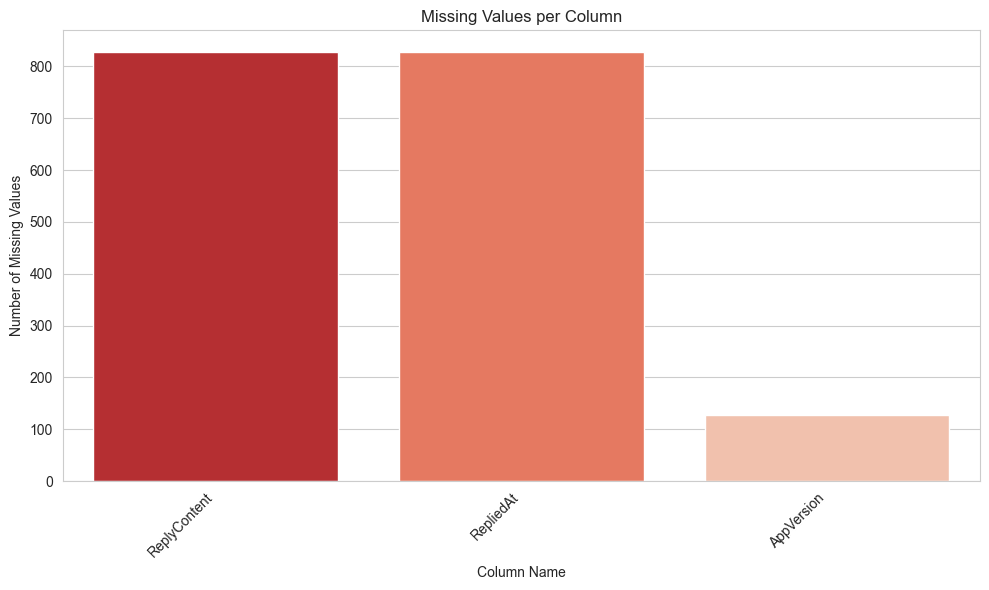


Checking specific columns:
Reviews with Developer Reply: 672
Reviews with App Version: 1373


In [13]:
# Cell 8: Missing Value Analysis
print("\n--- Missing Value Analysis ---")

# Check for missing values in the cleaned dataset
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100

missing_df = pd.DataFrame({'Count': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Count'] > 0].sort_values(by='Count', ascending=False)

if not missing_df.empty:
    print("Columns with Missing Values:")
    print(missing_df)

    # Bar chart of missing values
    plt.figure(figsize=(10, 6))
    sns.barplot(x=missing_df.index, y=missing_df['Count'], palette='Reds_r')
    plt.title('Missing Values per Column')
    plt.xlabel('Column Name')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found in the cleaned dataset.")

# Optional: Check for specific patterns (e.g., missing ReplyContent is common)
print("\nChecking specific columns:")
print(f"Reviews with Developer Reply: {df['ReplyContent'].notnull().sum()}")
print(f"Reviews with App Version: {df['AppVersion'].notnull().sum()}")

# prepare it for modeling

In [14]:
# In 02_eda_insights.ipynb
output_filename = 'cleaned_reviews_data.csv'
df.to_csv(output_filename, index=False) # Don't save the DataFrame index
print(f"Cleaned data saved to '{output_filename}'.")

Cleaned data saved to 'cleaned_reviews_data.csv'.
